In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import pandas as pd
import matplotlib.dates as mdates
from scipy import signal
#jtplot.style(theme='chesterish')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from math import sqrt
import matplotlib.backends.backend_pdf
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pickle
import Shape_fitter
import creep_part_identify as cpi
import Rheology_fitting_toolkit as rft
from tqdm.auto import tqdm
from matplotlib.patches import Rectangle
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_80884/578038577.py:16: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


/Users/dagi9522/miniconda3/envs/Aseismic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dictionary_all_events = {}
CREEPMETER = ['XHR']
for q in range(len(CREEPMETER)):
    print(CREEPMETER[q])
    tm, min10_creep, tm2, min10_creep2 = rft.import_text(CREEPMETER[q])

    if CREEPMETER[q] == 'XSJ' or CREEPMETER[q] == 'XHR' or CREEPMETER[q] == 'XPK':
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)
        tm_int2, min10_creep_int2 = rft.interpolate(tm2,min10_creep2,CREEPMETER)
    elif CREEPMETER[q] == 'XMR':
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)
        tm_int2, min10_creep_int2 = rft.interpolate_1min(tm2,min10_creep2,CREEPMETER)
    else:
        tm_int, min10_creep_int = rft.interpolate(tm,min10_creep,CREEPMETER)


    df_PICKS, duration, START = rft.creepmeter_events(CREEPMETER[q])

    if CREEPMETER[q] == 'XSJ' or CREEPMETER[q] == 'XHR' or CREEPMETER[q] == 'XPK':
        data1  = rft.vel_acc(tm_int,min10_creep_int,10/60)
        data2 = rft.vel_acc(tm_int2,min10_creep_int2,10/60)
        data = pd.concat([data1,data2],ignore_index=True)
    elif CREEPMETER[q] == 'XMR':
        data1  = rft.vel_acc(tm_int,min10_creep_int,10/60)
        data2 = rft.vel_acc_1min(tm_int2,min10_creep_int2,1/60)
        data = pd.concat([data1,data2],ignore_index=True)
    else:
        data = rft.vel_acc(tm_int,min10_creep_int,10/60)


    df_auto = rft.parkfield_remover(df_PICKS,CREEPMETER[q])


    df_rain_day_total = rft.rain_timeseries(CREEPMETER[q])

    df_auto = rft.when_does_it_rain(df_auto,CREEPMETER[q])
    
    if CREEPMETER[q] == 'CWN':
        C_matrix = np.load('../../Rheology/CWN/CWN_covariance_matrix_12days_18_APR_23.npy')
        C_matrix_inv_CWN = np.linalg.inv(C_matrix)
    
    if CREEPMETER[q] == 'XHR':
        C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
        C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
        C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
        C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
    

    
    dataframes_long, creep_index_long = rft.creep_event_dataframe(df_auto,duration, START, data,CREEPMETER[q])
    dataframes, creep_index = rft.creep_event_dataframe_short(dataframes_long,df_auto)

    Creep_phases = pd.read_csv("../../Rheology/{k}/Creep_phases_{k}.csv".format(k=CREEPMETER[q]),index_col=0)

XHR


In [3]:

event_no = []
slip = []
for i in tqdm(range(len(dataframes_long))):
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                event_no.append(i)
                slip.append(dataframes_long[i]['Slip'].iloc[-1]-dataframes_long[i]['Slip'].iloc[0])
    except FileNotFoundError:
        print(f'{i}' + 'FNF')
        continue

  4%|▍         | 5/114 [00:00<00:02, 46.05it/s]

0FNF
1FNF
3FNF
5FNF
6FNF


 12%|█▏        | 14/114 [00:00<00:03, 26.50it/s]

12FNF


 23%|██▎       | 26/114 [00:00<00:03, 26.83it/s]

20FNF
21FNF
23FNF


 37%|███▋      | 42/114 [00:01<00:01, 46.70it/s]

28FNF
29FNF
31FNF
32FNF
33FNF
34FNF
35FNF
36FNF
37FNF
38FNF
40FNF
42FNF
43FNF


 46%|████▋     | 53/114 [00:01<00:01, 37.20it/s]

50FNF
51FNF
54FNF
55FNF
57FNF
58FNF
59FNF
60FNF
61FNF
62FNF
63FNF


 64%|██████▍   | 73/114 [00:01<00:00, 51.39it/s]

65FNF
66FNF
69FNF
70FNF
71FNF
73FNF
74FNF
75FNF
76FNF
78FNF


 80%|███████▉  | 91/114 [00:02<00:00, 61.14it/s]

80FNF
82FNF
83FNF
84FNF
85FNF
86FNF
87FNF
89FNF


 86%|████████▌ | 98/114 [00:02<00:00, 49.08it/s]

92FNF
99FNF
100FNF


100%|██████████| 114/114 [00:02<00:00, 45.69it/s]

103FNF
104FNF
106FNF
107FNF
108FNF
109FNF
110FNF
111FNF
112FNF
113FNF


In [4]:
df_slip = pd.DataFrame({'Slip':slip})

In [5]:
dataframes_long[2]

,index,Time,Slip,Velocity,Acceleration
0,22142,0.000000,0.00,0.00,0.36
1,22143,0.166667,0.00,0.03,0.00
2,22144,0.333333,0.01,0.00,-0.09
3,22145,0.500000,0.00,0.00,0.09
4,22146,0.666667,0.01,0.03,-0.09
...,...,...,...,...,...
97,22239,16.166667,1.91,0.00,0.00
98,22240,16.333333,1.91,0.00,0.00
99,22241,16.500000,1.91,0.00,0.00
100,22242,16.666667,1.91,0.00,0.27


In [6]:
time_max_v = []
max_v_per = []
for j in range(len(event_no)):
    df = dataframes_long[event_no[j]]
    ce_only = df.drop(df[df.Time <2].index)
    try:
        ce_only.reset_index(inplace=True)
    except ValueError:
        print('woops')
        
    #print(ce_only)
    max_v = np.where(ce_only.Velocity==np.max(ce_only.Velocity))[0][0]
    ce_post_v = ce_only.drop(ce_only[ce_only.Time<ce_only.Time[max_v]].index)
    #print(ce_post_v)
    time_max_v.append(ce_only.Time[max_v]-2)
    new_test = ce_only.Velocity[max_v:].where(ce_only.Velocity[max_v:]*6/3600/1000<=10E-9)
    back_to_plate = new_test.dropna().index[0]
    max_v_per.append((max_v/back_to_plate)*100)
    #print(df.Time[max_v]-2)
    #del df

In [7]:
max_v = np.where(ce_only.Velocity==np.max(ce_only.Velocity))[0][0]
print(max_v)

8


In [8]:
new_test = ce_only.Velocity[max_v:].where(ce_only.Velocity[max_v:]*6/3600/1000<=10E-9)
new_test.dropna().index[0]

np.int64(22)

In [9]:
print(max_v,back_to_plate)

8 22


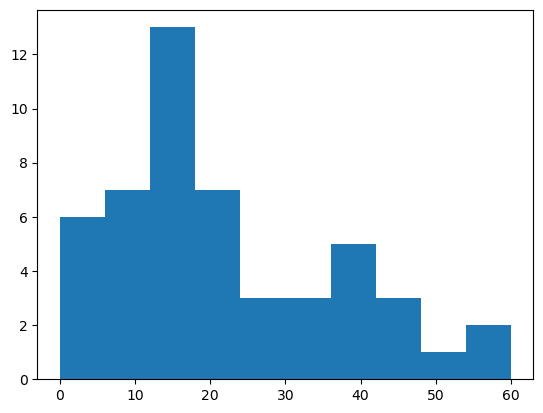

In [10]:
plt.figure()
plt.hist(max_v_per)
plt.show()

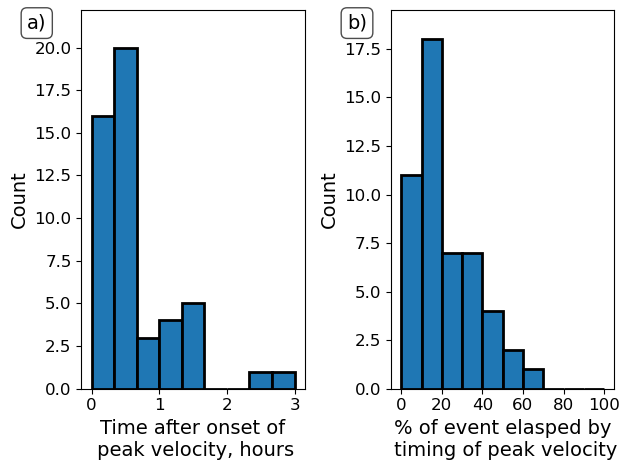

In [11]:
plt.close('all')
bins = np.linspace(0,3,10)
figure=plt.figure()
plt.subplot(1,2,1)
plt.hist(time_max_v,bins=bins,edgecolor='black',linewidth=2)
#plt.xlim([0,5])
plt.xlabel('Time after onset of\n peak velocity, hours',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks([0,1,2,3],[0,1,2,3],fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,22.2)
plt.subplot(1,2,2)
bins = np.linspace(0,100,11)
plt.hist(max_v_per,bins=bins,edgecolor='black',linewidth=2)
#plt.xlim([0,5])
plt.xlabel('% of event elasped by\n timing of peak velocity',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks([0,20,40,60,80,100],[0,20,40,60,80,100],fontsize=12)
plt.yticks(fontsize=12)
figure.text(0.05,0.93,'a)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.93,'b)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
plt.ylim(0,19.5)
plt.tight_layout()
#plt.savefig('../../Thesis_figs/Time_of_peak_velocity.pdf')
#plt.savefig('/media/exet4136/C984-C1A3/Time_of_peak_velocity.pdf')
plt.show()

In [12]:
df.Velocity*6/3600/1000

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
126    0.000000e+00
127    0.000000e+00
128    0.000000e+00
129    0.000000e+00
130    7.000000e-08
Name: Velocity, Length: 131, dtype: float64

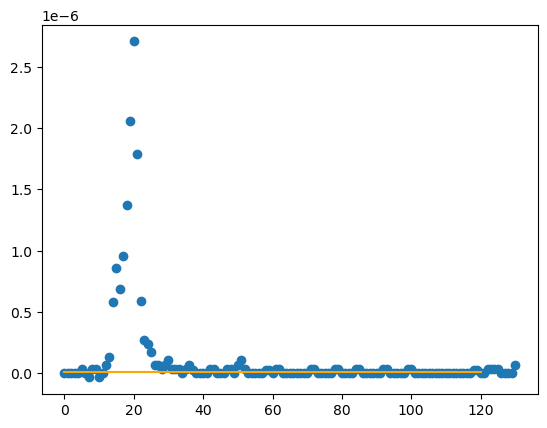

In [13]:
plt.figure()
plt.scatter(np.arange(0,len(df),1),df.Velocity*6/3600/1000)
plt.plot([0,120],[10E-9,10E-9],color='orange')
plt.show()

In [14]:
np.where(df.Velocity*6/3600/1000<=10E-9)[0][0]

np.int64(0)

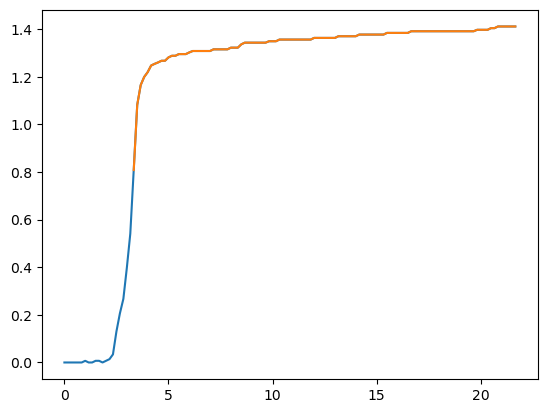

In [15]:
plt.figure()
plt.plot(df.Time,df.Slip)
plt.plot(df.Time[20:],df.Slip[20:])
plt.show()

In [16]:
def misfit(obs,pred,C):
    C_matrix_inv_selection = C[0:len(obs),0:len(obs)]
    diff = np.array((obs-pred))
    numerator = np.matmul(diff.T,np.matmul(C_matrix_inv_selection,diff))
    #print(numerator)
    denominator = np.matmul(np.array(obs).T,np.matmul(C_matrix_inv_selection,np.array(obs)))
    #denominator = np.dot(C_matrix_inv_selection,np.array(OBS_Data))
    #ratio_denominator = np.dot(np.array(OBS_Data),denominator)
    #ratio = Error_co_VIS/ratio_denominator
    ratio = numerator/denominator
    #obs_pred = abs((np.array(obs-pred)))
    return ratio

In [17]:
len(dataframes_long[0])

156

# full event

In [18]:
def calculate_aic(time, slip, C_inv, misfit, model_name):
    """
    Calculate AIC for a given model using normalized misfit.
    
    Parameters:
    - time: 1D numpy array of time observations
    - slip: 1D numpy array of observed slip values (OBS_Data)
    - covariance_matrix: 2D numpy array (covariance matrix of OBS_Data)
    - misfit: float, normalized misfit = (r.T @ C_inv @ r) / (d.T @ C_inv @ d)
    - model_name: string, name of the model (e.g., 'LNV', 'PLV', 'R+S_ss', etc.)
    
    Returns:
    - AIC: float, Akaike Information Criterion for the model
    """
    
    # Validate input shapes
    slip = np.asarray(slip).flatten()
    time = np.asarray(time).flatten()
    
    if slip.shape != time.shape:
        raise ValueError("Time and slip arrays must have the same shape.")
        
    n = len(slip)  # Number of observations
    
    
    d = slip  # observed data vector

    C_matrix_inv_selection = C_inv[0:len(d),0:len(d)]
    
    # Calculate denominator D = d.T @ C_inv @ d
    denominator = np.matmul(np.array(d).T ,np.matmul(C_matrix_inv_selection,np.array(d)))
    
    # Recover weighted residual sum of squares (unnormalized misfit)
    weighted_rss = misfit * denominator
    
    # Define number of parameters k based on model name
    # Update or extend this dictionary as needed for other models
    params_dict = {
        'LNV': 9,
        'PLV': 10,
        'VSFSS': 9,
        'VSFaSS': 10,
        'VSFbSS': 10,
    }
    
    if model_name not in params_dict:
        raise ValueError(f"Model name '{model_name}' not recognized. Please add it to params_dict.")
    
    k = params_dict[model_name]
    
    # Calculate AIC
    # Protect against taking log of zero or negative by enforcing a small positive floor
    eps = 1e-12
    mean_rss = weighted_rss / n
    if mean_rss < eps:
        mean_rss = eps
    
    AIC = 2 * k + n * np.log(mean_rss)
    
    return AIC

In [19]:
print('making figures')
#%matplotlib qt
LNV_misfit = []
PLV_misfit = []
VSF_SS_misfit = []
VSF_aSS_misfit = []
VSF_bSS_misfit = []
LNV_AIC = []
PLV_AIC = []
VSF_SS_AIC = []
VSF_aSS_AIC = []
VSF_bSS_AIC = []
no_data_points = []
LNV_all_params = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
PLV_all_params = pd.DataFrame(columns =['Ts','Vs','K','T01','S1','Tau1','V01','n1','T02','S2'])
VSF_SS_all_params = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
VSF_aSS_all_params = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Ta1','V01','t1','T02','S2'])
VSF_bSS_all_params = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Tau1','V01','A_B1','T02','S2'])

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
event_no = []
#pdf = matplotlib.backends.backend_pdf.PdfPages("../../Rheology/Single_rheology_28_APR_23/XHR/figures/full_rheology_fit_25_JUL_23.pdf")
for i in tqdm(range(len(dataframes_long))):
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    #print(len(Creep_Phase_no))
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                dictionary_VSF_bSS = pickle.load(tf)
                res_VSF_bSS = dictionary_VSF_bSS['fit']
                VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']
                df_bSS_append = pd.DataFrame([VSF_bSS_DF_params.loc['fitted'].values], columns=VSF_bSS_DF_params.loc['fitted'].index)
                VSF_bSS_all_params = pd.concat([VSF_bSS_all_params,df_bSS_append],ignore_index=True)
                #print(VSF_bSS_all_params.iloc[-1])
                #print(res_VSF_SS.x)
                event_no.append(i)
    except FileNotFoundError:
        #print('FNF')
        continue
    #try:
    #    with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
    #        dictionary_VSF_aSS = pickle.load(tf)
    #        res_VSF_aSS = dictionary_VSF_aSS['fit']
    #        VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
    #        VSF_aSS_all_params = VSF_aSS_all_params.append(VSF_aSS_DF_params.loc['fitted'],ignore_index=True)
    #except FileNotFoundError:
    #    #print('FNF')
    #    continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_t1_2_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
            df_aSS_append = pd.DataFrame([VSF_aSS_DF_params.loc['fitted'].values], columns=VSF_aSS_DF_params.loc['fitted'].index)
            VSF_aSS_all_params = pd.concat([VSF_aSS_all_params,df_aSS_append],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']
            df_SS_append = pd.DataFrame([VSF_SS_DF_params.loc['fitted'].values], columns=VSF_SS_DF_params.loc['fitted'].index)
            VSF_SS_all_params = pd.concat([VSF_SS_all_params,df_SS_append],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
            df_PLV_append = pd.DataFrame([PLV_DF_params.loc['fitted'].values], columns=PLV_DF_params.loc['fitted'].index)
            PLV_all_params = pd.concat([PLV_all_params,df_PLV_append],ignore_index=True)    
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
            df_LNV_append = pd.DataFrame([LNV_DF_params.loc['fitted'].values], columns=LNV_DF_params.loc['fitted'].index)
            LNV_all_params = pd.concat([LNV_all_params,df_LNV_append],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
        
    test_t = np.array(dataframes_long[i].Time)
    rft.check_dir("../../Rheology/Single_rheology_28_APR_23/XHR/figures/Nelder-Mead".format(k=CREEPMETER[q]))
                        #plot_maker_dromedary(LNV_DF_params.loc['fitted'],PLV_DF_params.loc['fitted'],VSF_SS_DF_params.loc['fitted'],VSF_bSS_DF_params.loc['fitted'],VSF_aSS_DF_params.loc['fitted'],\
                         #                    dataframes,j)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    #print(len(slip_LNV))
    #print(len(dataframes_long))
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    #LNV_misfit.append(misfit(dataframes_long[i].Slip,slip_LNV,C_matrix_inv))
    #print(misfit(dataframes_long[i].Slip,slip_LNV,C_matrix_inv))
    #print(res_LNV.fun)
    #PLV_misfit.append(misfit(dataframes_long[i].Slip,slip_PLV,C_matrix_inv))
    #VSF_SS_misfit.append(misfit(dataframes_long[i].Slip,slip_VSF,C_matrix_inv))
    #VSF_aSS_misfit.append(misfit(dataframes_long[i].Slip,slip_VSF_aSS,C_matrix_inv))
    #VSF_bSS_misfit.append(misfit(dataframes_long[i].Slip,slip_VSF_bSS,C_matrix_inv))
    
    LNV_misfit.append(res_LNV.fun)
    #print(misfit(dataframes_long[i].Slip,slip_LNV,C_matrix_inv))
    #print(res_LNV.fun)
    PLV_misfit.append(res_PLV.fun)
    VSF_SS_misfit.append(res_VSF_SS.fun)
    VSF_aSS_misfit.append(res_VSF_aSS.fun)
    VSF_bSS_misfit.append(res_VSF_bSS.fun)

    LNV_AIC.append(calculate_aic(test_t,slip_LNV,C_matrix_inv,res_LNV.fun,'LNV'))
    PLV_AIC.append(calculate_aic(test_t,slip_PLV,C_matrix_inv,res_PLV.fun,'PLV'))
    VSF_SS_AIC.append(calculate_aic(test_t,slip_VSF,C_matrix_inv,res_VSF_SS.fun,'VSFSS'))
    VSF_aSS_AIC.append(calculate_aic(test_t,slip_VSF_aSS,C_matrix_inv,res_VSF_aSS.fun,'VSFaSS'))
    VSF_bSS_AIC.append(calculate_aic(test_t,slip_VSF_bSS,C_matrix_inv,res_VSF_bSS.fun,'VSFbSS'))

    '''LNV_AIC.append(2*9+len(dataframes_long)*np.log(res_LNV.fun))
    PLV_AIC.append(2*10+len(dataframes_long)*np.log(res_PLV.fun))
    VSF_SS_AIC.append(2*9+len(dataframes_long)*np.log(res_VSF_SS.fun))
    VSF_aSS_AIC.append(2*10+len(dataframes_long)*np.log(res_VSF_bSS.fun))
    VSF_bSS_AIC.append(2*10+len(dataframes_long)*np.log(res_VSF_aSS.fun))'''
    
    '''test_t = np.arange(0,max(dataframes_long[i].Time.iloc[1:]),0.01)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    colors = ['#74add1','#313695','#a50026','#d73027','#f46d43','#fdae61']
    colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
    plt.figure()
    plt.scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip, label='Observed Data',s=5,color='#000000', zorder=100)   
    plt.plot(test_t-2,slip_LNV,label = 'Linear Viscous Flow', color = colors[3], linewidth=2, linestyle = '-')
    plt.plot(test_t-2,slip_PLV,label='Power-law Viscous Flow', color = colors[4], linewidth=2, linestyle = '--')
    plt.plot(test_t-2,slip_VSF,label = 'Velocity Strengthening Friction\n - steady state', color = colors[0], linewidth=2, linestyle = '-.')
    plt.plot(test_t-2,slip_VSF_aSS,label = 'R+S - Stress >> Steady State', color = colors[1], linewidth=2, linestyle = 'dotted')
    plt.plot(test_t-2,slip_VSF_bSS,label = 'R+S - Stress << Steady State', color = colors[2], linewidth=2, linestyle = (0, (3, 1, 1, 1, 1, 1)))
    plt.legend(fontsize=11)
    plt.xlabel('Time since start of event, hrs', fontsize=14)
    plt.ylabel('Slip, mm',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('{K}_{P}'.format(K = CREEPMETER[q], P = i ),fontsize=18)
    figure = plt.gcf()  # get current figure
    figure.set_size_inches(6,6)
    plt.tight_layout()
    plt.show()
    plt.close()'''
    #for fig in range(1, plt.gcf().number + 1):
    #    pdf.savefig( fig , dpi=600)
    #    plt.close('all')

#pdf.close()   

making figures


100%|██████████| 114/114 [00:12<00:00,  9.41it/s]


In [20]:
print(PLV_AIC,LNV_AIC)

[np.float64(366.84256708201667), np.float64(35.35213072698106), np.float64(196.81799409918), np.float64(15.912085173509215), np.float64(508.81620595690373), np.float64(62.06975078171919), np.float64(376.54567733356527), np.float64(720.7244083141453), np.float64(167.90883884998763), np.float64(333.79457387362766), np.float64(234.4298144757011), np.float64(164.26820225048266), np.float64(894.8100740242936), np.float64(-7.323715405371772), np.float64(295.3677281536788), np.float64(424.7134306376384), np.float64(711.4823187256692), np.float64(173.28171778602734), np.float64(302.3527657672044), np.float64(265.75240887147527), np.float64(32.995330792463676), np.float64(17.300030167383497), np.float64(-12.717075811658205), np.float64(276.735552340311), np.float64(558.870755478126), np.float64(492.1279048660917), np.float64(547.7084444927407), np.float64(196.42776164810093), np.float64(394.73352349506433), np.float64(352.595509227484), np.float64(18.455880378453337), np.float64(158.95809610888

In [21]:
res_PLV.x

array([ 2.4620506 ,  0.16904464, -0.21865885,  3.16666667,  0.37307835,
        0.53750524,  1.623     ,  0.97176599, 21.77690753,  1.421     ])

In [22]:
LNV_all_params

,Ts,Vs,K,T01,S1,Tau1,V01,T02,S2
0,1.274866,0.120000,-0.268416,2.333333,0.069003,1.076090,1.500000,17.323266,1.920000
1,2.043365,0.078752,-0.029364,3.333333,0.199798,0.769286,0.480000,32.939074,0.630000
2,0.888859,0.143917,-0.102230,2.166667,-0.021776,0.741667,0.489192,23.524181,0.690343
3,1.838710,0.019336,-0.022702,3.333333,0.005821,0.769849,0.150000,11.080952,0.170506
4,0.201384,0.030000,-0.064497,2.280361,-0.003731,0.678047,3.180000,22.500000,2.370000
5,0.512993,0.030000,-0.021315,2.000000,0.025405,0.474083,1.200000,3.971573,0.599684
6,0.220354,0.000000,-0.028561,2.301328,-0.004083,0.854380,2.100000,19.416138,1.840000
7,0.337942,0.515654,-0.444679,2.333333,-0.023661,0.475709,4.530000,35.510427,3.390000
8,0.533826,0.097101,-0.081233,2.067721,0.007085,0.779994,1.380000,21.512201,1.292802
9,0.220916,0.060000,-0.147286,2.833333,0.039938,0.720763,2.100000,19.191661,1.750000


In [23]:
#LNV_all_params_BS.reset_index(inplace=True)
LNV_all_params.rename(columns={'Tau1':'$t_c$','V01':'$V_0$'},inplace=True)

#PLV_all_params_BS.reset_index(inplace=True)
PLV_all_params.rename(columns={'Tau1':'$t_c$','V01':'$V_0$','n1':'n'},inplace=True)

#VSF_SS_all_params_BS.reset_index(inplace=True)
VSF_SS_all_params.rename(columns={'Tau1':'$t_ss$','V01':'$V_0$'},inplace=True)

#VSF_aSS_all_params_BS.reset_index(inplace=True)
VSF_aSS_all_params.rename(columns={'Ta1':'$t_a$','V01':'$V_0$','t1':'$t_1$'},inplace=True)

#VSF_bSS_all_params_BS.reset_index(inplace=True)
VSF_bSS_all_params.rename(columns={'Tau1':'$\theta_0$','V01':'$V_0$','A_B1':'$B/A$'},inplace=True)

    

In [24]:
colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']

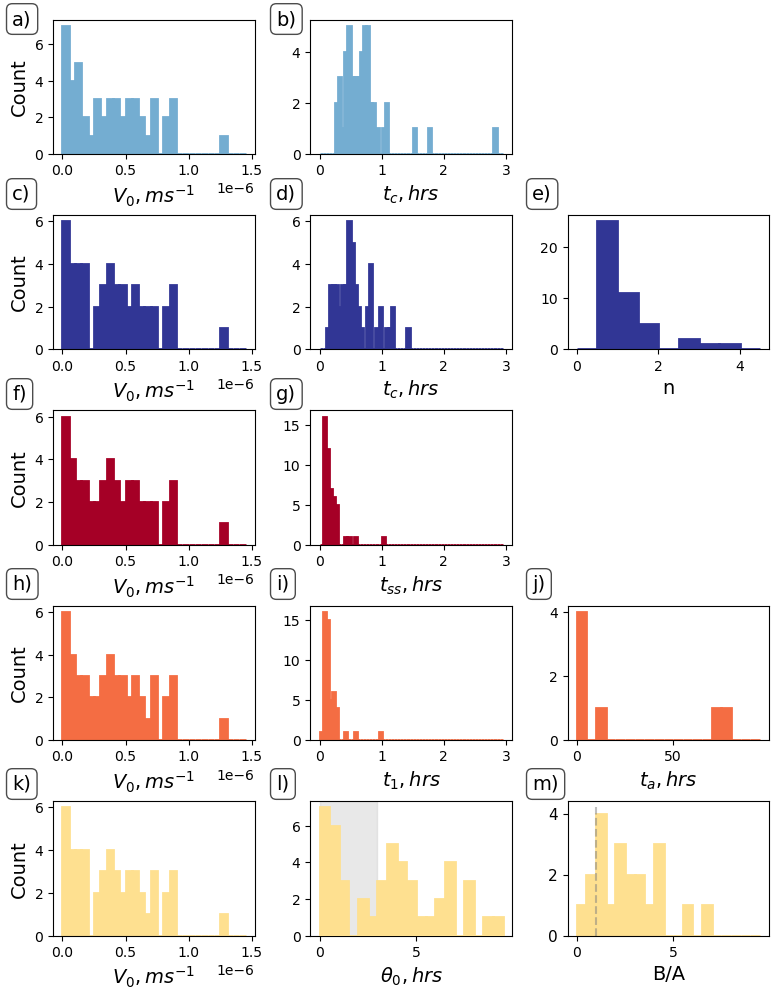

In [25]:
#%matplotlib qt
plt.close('all')
plt.figure()
ax1=plt.subplot2grid((5,3),(0,0),1,1)
bins = np.arange(0,0.0015/1000,0.00005/1000)#bins = np.linspace(0,5,51)
plt.hist(LNV_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
#plt.ylim([0,7000])
#plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)
#ax1.yaxis.set_major_formatter(formatter) 
#ax1.set_xticklabels([])

ax4 = plt.subplot2grid((5,3),(1,0),1,1)
plt.hist(PLV_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
#plt.ylim([0,7000])
#plt.xticks([0,0.0005/1000,0.001/1000,0.0015/1000],[0,0.0005/1000,0.001/1000,0.0015/1000])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)
#ax4.yaxis.set_major_formatter(formatter) 

ax7 = plt.subplot2grid((5,3),(2,0),1,1)
plt.hist(VSF_SS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
#plt.ylim([0,7000])
#plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)
#ax7.yaxis.set_major_formatter(formatter) 

ax10 = plt.subplot2grid((5,3),(3,0),1,1)
plt.hist(VSF_aSS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
#plt.ylim([0,7000])
#plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)
#ax10.yaxis.set_major_formatter(formatter) 

ax13 = plt.subplot2grid((5,3),(4,0),1,1)
plt.hist(VSF_bSS_all_params['$V_0$']/3600/1000,bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2])
#plt.ylim([0,7000])
#plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, ms^{-1}$',fontsize=14)
#ax13.yaxis.set_major_formatter(formatter) 

ax2 = plt.subplot2grid((5,3),(0,1),1,1)
bins = np.arange(0,3,0.05)#bins = np.linspace(0,5,51)
plt.hist(LNV_all_params['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_c, hrs$',fontsize=14)
#ax2.yaxis.set_major_formatter(formatter) 
#ax1.set_xticklabels([])

ax5 = plt.subplot2grid((5,3),(1,1),1,1)
plt.hist(PLV_all_params['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_c, hrs$',fontsize=14)
#ax5.yaxis.set_major_formatter(formatter) 

ax8 = plt.subplot2grid((5,3),(2,1),1,1)
plt.hist(VSF_SS_all_params['$t_ss$'],bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_{ss}, hrs$',fontsize=14)
#ax8.yaxis.set_major_formatter(formatter) 

ax11 = plt.subplot2grid((5,3),(3,1),1,1)
plt.hist(VSF_aSS_all_params['$t_1$'],bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_1, hrs$',fontsize=14)
#ax11.yaxis.set_major_formatter(formatter) 

ax14 = plt.subplot2grid((5,3),(4,1),1,1)
bins = np.arange(0,10,0.5)
plt.hist(VSF_bSS_all_params['$\theta_0$'],bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],zorder=100)
left,right = ax14.get_xlim()
bottom,top = ax14.get_ylim()
ax14.add_patch(Rectangle((0,bottom),3,top-bottom, facecolor='lightgrey', edgecolor='lightgrey',alpha=0.5,zorder=2))
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel("$\\theta_0 , hrs$",fontsize=14)
#plt.xlabel('$V_0, mms^{-1}$')
#ax14.yaxis.set_major_formatter(formatter) 

ax6 = plt.subplot2grid((5,3),(1,2),1,1)
bins=np.arange(0,5,0.5)
plt.hist(PLV_all_params['n'],histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4],bins=bins)
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('n',fontsize=14)
#ax6.yaxis.set_major_formatter(formatter) 

ax12 = plt.subplot2grid((5,3),(3,2),1,1)
bins=np.arange(0,100,5)
plt.hist(VSF_aSS_all_params['$t_a$'],histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1],bins=bins)
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_a, hrs$',fontsize=14)
bins=np.arange(0,10,0.5)
#ax12.yaxis.set_major_formatter(formatter) 

ax15 = plt.subplot2grid((5,3),(4,2),1,1)
plt.hist(VSF_bSS_all_params['$B/A$'],histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],bins=bins)
#plt.ylim([0,7000])
plt.yticks(fontsize=14)
#plt.ylabel('Count',fontsize=14)
plt.xlabel("B/A",fontsize=14)
plt.yticks(fontsize=11)
bottom,top = ax15.get_ylim()
ax15.plot([1,1],[bottom,top],color='grey',alpha=0.5,linestyle='--')
#plt.xticks([0,1,2,4,8],[0,1,2,4,8])
#ax15.yaxis.set_major_formatter(formatter) 
figure = plt.gcf()
figure.subplots_adjust(left=0.101, bottom=0.064, right=0.996, top=0.980, wspace=0.276, hspace=0.453)
figure.set_size_inches(8,10)
figure.text(0.05,0.975,'a)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.975,'b)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.8,'c)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.8,'d)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.8,'e)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.60,'f)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.60,'g)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.41,'h)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.41,'i)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.41,'j)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.21,'k)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.21,'l)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.21,'m)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
plt.show()

In [38]:
data_lines_XHR = pd.DataFrame({'LNV':LNV_misfit,'PLV':PLV_misfit,'VSF_SS':VSF_SS_misfit,'VSF_aSS':VSF_aSS_misfit,'VSF_bSS':VSF_bSS_misfit})
rheology_XHR = data_lines_XHR.idxmin(axis=1,skipna=True)
LNV_Count_XHR   = (np.sum(rheology_XHR.str.count("LNV"))/len(LNV_misfit))*100
PLV_Count_XHR  = (np.sum(rheology_XHR.str.count("PLV"))/len(PLV_misfit))*100
VSF_SS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_SS"))/len(VSF_SS_misfit))*100
VSF_aSS_Count_XHR = (np.sum(rheology_XHR.str.count("VSF_aSS"))/len(VSF_aSS_misfit))*100
VSF_bSS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_bSS"))/len(VSF_bSS_misfit))*100
print('Linear Viscous Flow %: {k}'.format(k=LNV_Count_XHR.round(0)))
print('Power-law Viscous Flow %: {k}'.format(k=PLV_Count_XHR.round(0)))
print('Velocity Strenthening Friction, SS %: {k}'.format(k=VSF_SS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S > SS %: {k}'.format(k=VSF_aSS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S << SS %: {k}'.format(k=VSF_bSS_Count_XHR.round(0)))

Linear Viscous Flow %: 2.0
Power-law Viscous Flow %: 74.0
Velocity Strenthening Friction, SS %: 0.0
Velocity Strenthening Friction, S > SS %: 8.0
Velocity Strenthening Friction, S << SS %: 16.0


In [39]:
AIC = pd.DataFrame({'LNV':LNV_AIC,'PLV':PLV_AIC,'VSF_SS':VSF_SS_AIC,'VSF_aSS':VSF_aSS_AIC,'VSF_bSS':VSF_bSS_AIC})
rheology_XHR = AIC.idxmin(axis=1,skipna=True)
LNV_Count_XHR   = (np.sum(rheology_XHR.str.count("LNV"))/len(LNV_misfit))*100
PLV_Count_XHR  = (np.sum(rheology_XHR.str.count("PLV"))/len(PLV_misfit))*100
VSF_SS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_SS"))/len(VSF_SS_misfit))*100
VSF_aSS_Count_XHR = (np.sum(rheology_XHR.str.count("VSF_aSS"))/len(VSF_aSS_misfit))*100
VSF_bSS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_bSS"))/len(VSF_bSS_misfit))*100
print('Linear Viscous Flow %: {k}'.format(k=LNV_Count_XHR.round(0)))
print('Power-law Viscous Flow %: {k}'.format(k=PLV_Count_XHR.round(0)))
print('Velocity Strenthening Friction, SS %: {k}'.format(k=VSF_SS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S > SS %: {k}'.format(k=VSF_aSS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S << SS %: {k}'.format(k=VSF_bSS_Count_XHR.round(0)))

Linear Viscous Flow %: 40.0
Power-law Viscous Flow %: 42.0
Velocity Strenthening Friction, SS %: 2.0
Velocity Strenthening Friction, S > SS %: 6.0
Velocity Strenthening Friction, S << SS %: 10.0


In [40]:
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS
0,373.125495,366.842567,455.356173,458.475122,382.493400
1,95.156663,35.352131,103.052165,113.537415,35.352130
2,262.806052,196.817994,190.157188,189.743064,192.082127
3,16.217386,15.912085,46.032339,48.454178,18.901370
4,519.803590,508.816206,575.457119,579.322303,508.816207
5,75.581643,62.069751,95.923053,97.997934,80.587261
6,377.768775,376.545677,493.697987,498.334007,385.764043
7,749.775049,720.724408,904.831225,912.343043,720.724409
8,176.072908,167.908839,327.178491,332.347576,167.908837
9,345.810749,333.794574,472.007818,476.688768,333.794574


In [41]:
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS
0,373.125495,366.842567,455.356173,458.475122,382.493400
1,95.156663,35.352131,103.052165,113.537415,35.352130
2,262.806052,196.817994,190.157188,189.743064,192.082127
3,16.217386,15.912085,46.032339,48.454178,18.901370
4,519.803590,508.816206,575.457119,579.322303,508.816207
5,75.581643,62.069751,95.923053,97.997934,80.587261
6,377.768775,376.545677,493.697987,498.334007,385.764043
7,749.775049,720.724408,904.831225,912.343043,720.724409
8,176.072908,167.908839,327.178491,332.347576,167.908837
9,345.810749,333.794574,472.007818,476.688768,333.794574


In [42]:
DAIC_LNV = []
DAIC_PLV = []
DAIC_VSF_SS = []
DAIC_VSF_aSS = []
DAIC_VSF_bSS = []
for i in range(len(AIC)):
    DAIC_LNV.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['LNV'])
    DAIC_PLV.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['PLV'])
    DAIC_VSF_SS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_SS'])
    DAIC_VSF_aSS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_aSS'])
    DAIC_VSF_bSS.append((AIC.iloc[i] - AIC[rheology_XHR[i]].iloc[i])['VSF_bSS'])
AIC['delta_AIC_lnv'] = DAIC_LNV
AIC['delta_AIC_plv'] = DAIC_PLV
AIC['delta_AIC_vsfss'] = DAIC_VSF_SS
AIC['delta_AIC_vsfass'] = DAIC_VSF_aSS
AIC['delta_AIC_vsfbss'] = DAIC_VSF_bSS
AIC['Slip'] = df_slip['Slip']

In [43]:
def flag_model_selection_uncertainty(aic_df, delta_cols):
    """
    Flags the best model and whether there's model uncertainty (ΔAIC ≤ 2).
    
    Parameters:
    - aic_df: pd.DataFrame with AIC and ΔAIC columns
    - delta_cols: list of column names corresponding to delta AIC values
    
    Returns:
    - pd.DataFrame with new columns:
        - 'best_model': model with lowest AIC
        - 'competitive_models': list of models with ΔAIC ≤ 2
        - 'uncertain': True if multiple models are competitive
    """
    results = []
    
    for idx, row in aic_df.iterrows():
        delta_values = row[delta_cols]
        
        # Get models with delta AIC ≤ 2
        competitive_models = [col.replace('delta_AIC_', '').upper()
                              for col in delta_cols if row[col] <= 2]
        
        best_model = row[['LNV', 'PLV', 'VSF_SS', 'VSF_aSS', 'VSF_bSS']].idxmin()
        
        results.append({
            'best_model': best_model,
            'competitive_models': competitive_models,
            'uncertain': len(competitive_models) > 1
        })
    
    return pd.DataFrame(results)


In [44]:
delta_cols = ['delta_AIC_lnv', 'delta_AIC_plv', 'delta_AIC_vsfss', 'delta_AIC_vsfass', 'delta_AIC_vsfbss']
model_selection_flags = flag_model_selection_uncertainty(AIC, delta_cols)

# Combine with original dataframe if you like
AIC = pd.concat([AIC, model_selection_flags], axis=1)
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_lnv,delta_AIC_plv,delta_AIC_vsfss,delta_AIC_vsfass,delta_AIC_vsfbss,Slip,best_model,competitive_models,uncertain
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True


In [45]:
AIC['PLV_N'] = PLV_all_params['n']
AIC

,LNV,PLV,VSF_SS,VSF_aSS,VSF_bSS,delta_AIC_lnv,delta_AIC_plv,delta_AIC_vsfss,delta_AIC_vsfass,delta_AIC_vsfbss,Slip,best_model,competitive_models,uncertain,PLV_N
0,373.125495,366.842567,455.356173,458.475122,382.493400,6.282928,0.000000e+00,88.513606,91.632555,1.565083e+01,1.910,PLV,[PLV],False,0.926243
1,95.156663,35.352131,103.052165,113.537415,35.352130,59.804533,8.965694e-07,67.700035,78.185285,0.000000e+00,0.640,VSF_bSS,"[PLV, VSFBSS]",True,2.528452
2,262.806052,196.817994,190.157188,189.743064,192.082127,73.062988,7.074930e+00,0.414124,0.000000,2.339063e+00,0.700,VSF_aSS,"[VSFSS, VSFASS]",True,5.000000
3,16.217386,15.912085,46.032339,48.454178,18.901370,0.305301,0.000000e+00,30.120254,32.542093,2.989285e+00,0.180,PLV,"[LNV, PLV]",True,0.906107
4,519.803590,508.816206,575.457119,579.322303,508.816207,10.987384,0.000000e+00,66.640913,70.506097,8.583064e-07,2.360,PLV,"[PLV, VSFBSS]",True,1.515351
5,75.581643,62.069751,95.923053,97.997934,80.587261,13.511892,0.000000e+00,33.853302,35.928183,1.851751e+01,0.590,PLV,[PLV],False,0.702201
6,377.768775,376.545677,493.697987,498.334007,385.764043,1.223098,0.000000e+00,117.152309,121.788330,9.218365e+00,1.830,PLV,"[LNV, PLV]",True,0.948891
7,749.775049,720.724408,904.831225,912.343043,720.724409,29.050641,0.000000e+00,184.106817,191.618634,7.413151e-07,3.380,PLV,"[PLV, VSFBSS]",True,1.355462
8,176.072908,167.908839,327.178491,332.347576,167.908837,8.164071,1.888024e-06,159.269654,164.438739,0.000000e+00,1.300,VSF_bSS,"[PLV, VSFBSS]",True,1.217909
9,345.810749,333.794574,472.007818,476.688768,333.794574,12.016175,0.000000e+00,138.213245,142.894194,3.897405e-07,1.740,PLV,"[PLV, VSFBSS]",True,1.298931


In [47]:
AIC.to_csv('../../Rheology/AIC_XHR.csv')

In [62]:
# Count how many times each model was best
print(AIC['best_model'].value_counts())

# Percentage of events with uncertain selection
print(AIC['uncertain'].mean() * 100)  # in percent


best_model
PLV        21
LNV        20
VSF_bSS     5
VSF_aSS     3
VSF_SS      1
Name: count, dtype: int64
82.0


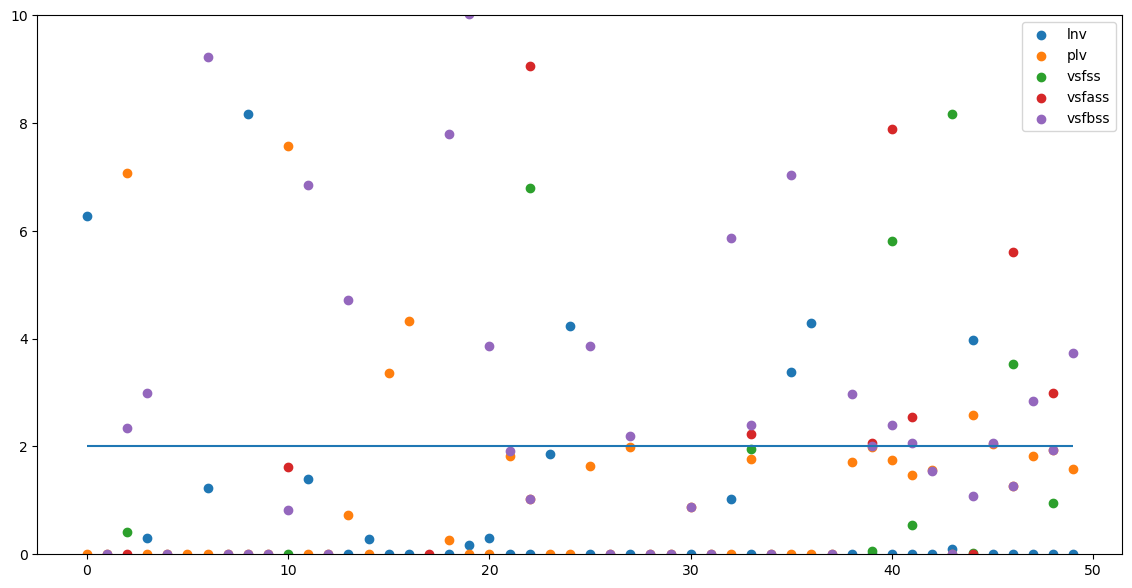

In [54]:
x = np.arange(0,len(data_lines_XHR),1)

plt.figure(figsize=(14,7))
plt.scatter(x,AIC['delta_AIC_lnv'],label='lnv')
plt.scatter(x,AIC['delta_AIC_plv'],label='plv')
plt.scatter(x,AIC['delta_AIC_vsfss'],label = 'vsfss')
plt.scatter(x,AIC['delta_AIC_vsfass'],label='vsfass')
plt.scatter(x,AIC['delta_AIC_vsfbss'],label='vsfbss')
plt.hlines(2,x[0],x[-1])
plt.legend()
plt.ylim([0,10])
plt.show()

In [ ]:
#data_lines_XHR.iloc[0].sort_values()
#np.where(np.array(event_no)==)

#test_df_alpha = pd.DataFrame(data_lines_XHR.iloc[0].sort_values())
#test_df_alpha['alpha'] = [1,0.8,0.6,0.4,0.2]
#test_df_alpha['alpha'].loc['PLV']
#np.where(event_no==4)

In [ ]:
event_no

In [ ]:
np.where(np.array(event_no)==4)[0][0]   

making figures
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']
['#a50026', '#f46d43', '#fee090', '#74add1', '#313695']


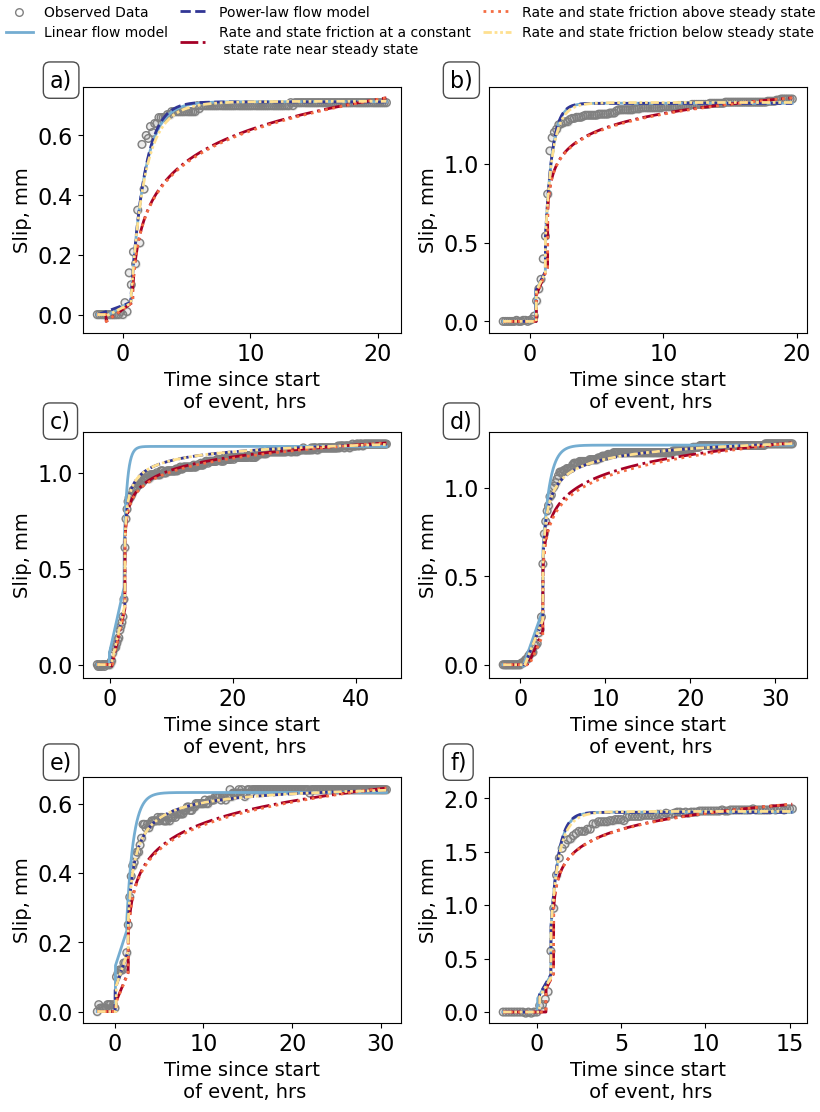

In [34]:
print('making figures')
#%matplotlib qt
from matplotlib import ticker
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
selection = [105,88,72,64,30,4]
#selection=[2,2,2,2,2,2]
fig, axes = plt.subplots(nrows=3,ncols=2)#figure()
for j in range(len(selection)):
    i = selection[j]
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    #print(len(Creep_Phase_no))
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
        #with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_shorter_90_dictionary_multi_phase_Nelder-Mead_15_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_bSS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_bSS['fit']
            VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']
            #VSF_bSS_all_params = VSF_bSS_all_params.append(VSF_bSS_DF_params.loc['fitted'],ignore_index=True)
            #print(VSF_bSS_all_params.iloc[-1])
            #print(res_VSF_SS.x)
            #print('here')
    except FileNotFoundError:
        print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
        #with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_shorter_90_dictionary_multi_phase_Nelder-Mead_15_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
            #VSF_aSS_all_params = VSF_aSS_all_params.append(VSF_aSS_DF_params.loc['fitted'],ignore_index=True)
            #print('here')
    except FileNotFoundError:
        print('FNF')
        continue
    #try:
    #    with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_t1_2_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
    #        dictionary_VSF_aSS = pickle.load(tf)
    #        res_VSF_aSS = dictionary_VSF_aSS['fit']
    #        VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
    #        VSF_aSS_all_params = VSF_aSS_all_params.append(VSF_aSS_DF_params.loc['fitted'],ignore_index=True)
    #except FileNotFoundError:
    #    #print('FNF')
    #    continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
        #with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_shorter_90_dictionary_multi_phase_Nelder-Mead_15_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']
            #VSF_SS_all_params = VSF_SS_all_params.append(VSF_SS_DF_params.loc['fitted'],ignore_index=True)
            #print('here')
    except FileNotFoundError:
        print('FNF')
        continue
    try:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
        #with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_shorter_90_dictionary_multi_phase_Nelder-Mead_15_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
            #PLV_all_params = PLV_all_params.append(PLV_DF_params.loc['fitted'],ignore_index=True)
            #print('here')
    except FileNotFoundError:
        print('FNF')
        continue
    try:
        #with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_shorter_90_dictionary_multi_phase_Nelder-Mead_15_MAY_23.txt".format(i=i), "rb") as tf:
        with open("../../Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
            #LNV_all_params = LNV_all_params.append(LNV_DF_params.loc['fitted'],ignore_index=True)
            #print('here')
    except FileNotFoundError:
        print('FNF')
        continue
        
    
    #print('wtf')
    test_t = np.arange(0,max(dataframes_long[i].Time.iloc[1:]),0.01)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    #colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
    #colors = ['#0077bb','#009988','#33bbee','#ee7733','#ee3377']
    colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']
    print(colors)

    test_df_alpha = pd.DataFrame(data_lines_XHR.iloc[np.where(np.array(event_no)==4)[0][0]].sort_values())
    test_df_alpha['alpha'] = [1,0.75,0.5,0.25,0.125]
    
    #plt.subplot(3,2,j+1)
    if (j % 2) == 0:
        y = 1
    else:
        y=0
    x=int(np.array(j/2.1).round(0))
    linewidth = 2
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,color='grey',alpha=0.15,marker='o',s=30)
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,facecolors='none', edgecolors='grey',marker='o',s=30)
    axes[x,y].plot(test_t-2,slip_LNV, color = colors[3], linewidth=linewidth, linestyle = '-')#,alpha=test_df_alpha['alpha'].loc['LNV'])
    axes[x,y].plot(test_t-2,slip_PLV, color = colors[4], linewidth=linewidth, linestyle = '--')#,alpha=test_df_alpha['alpha'].loc['PLV'])
    axes[x,y].plot(test_t-2,slip_VSF, color = colors[0], linewidth=linewidth, linestyle = '-.')#,alpha=test_df_alpha['alpha'].loc['VSF_SS'])
    axes[x,y].plot(test_t-2,slip_VSF_aSS, color = colors[1], linewidth=linewidth, linestyle = 'dotted')#,alpha=test_df_alpha['alpha'].loc['VSF_aSS'])
    axes[x,y].plot(test_t-2,slip_VSF_bSS, color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))#,alpha=test_df_alpha['alpha'].loc['VSF_bSS'])
    #plt.legend(fontsize=11)
    axes[x,y].set_xlabel('Time since start\n of event, hrs', fontsize=14)
    axes[x,y].set_ylabel('Slip, mm',fontsize=14)
    #axes[x,y].xticks(fontsize=14)
    #axes[x,y].yticks(fontsize=14)
axes[2,1].set_ylim([-0.1,2.2])
axes[1,1].scatter([],[], label='Observed Data',facecolors='none', edgecolors='grey',marker='o',s=30)   
axes[1,1].plot([],[],label = 'Linear flow model', color = colors[3], linewidth=linewidth, linestyle = '-')
axes[1,1].plot([],[],label='Power-law flow model', color = colors[4], linewidth=linewidth, linestyle = '--')
axes[1,1].plot([],[],label = 'Rate and state friction at a constant\n state rate near steady state', color = colors[0], linewidth=linewidth, linestyle = '-.')
axes[1,1].plot([],[],label = 'Rate and state friction above steady state', color = colors[1], linewidth=linewidth, linestyle = 'dotted')
axes[1,1].plot([],[],label = 'Rate and state friction below steady state', color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))
#axes[0,0].legend(bbox_to_anchor=(0, 1.02, 2, .102), loc='lower left',ncol=6, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10) 
figure = plt.gcf()  # get current figure
figure.set_size_inches(8,11)
figure.text(0.05,0.93,'a)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.93,'b)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.62,'c)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.62,'d)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.31,'e)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.31,'f)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.legend(ncol=3, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10)
figure.subplots_adjust(left=0.091, bottom=0.079, right=0.996, top=0.930, wspace=0.276, hspace=0.403) #full event
#figure.subplots_adjust(left=0.126, bottom=0.079, right=0.996, top=0.910, wspace=0.276, hspace=0.403) #shorter

#plt.tight_layout()
#plt.savefig('../../Thesis_figs/Rheology_examples_data_atop.pdf')
#plt.savefig('../../Thesis_figs/Rheology_examples_data_atop_short_fit.pdf')
#plt.savefig('/media/exet4136/C984-C1A3/Rheology_examples_data_atop_short_fit.pdf')
    

In [35]:
linewidth

2

making figures


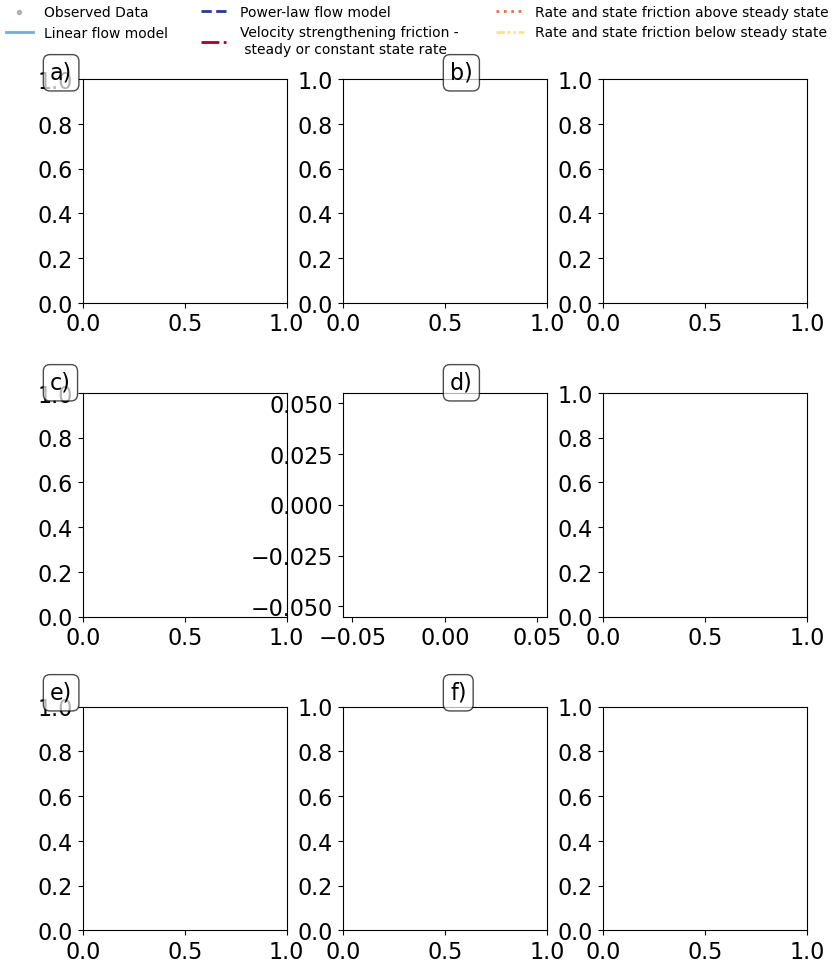

In [36]:
print('making figures')
#%matplotlib qt
from matplotlib import ticker
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
selection = [105,72,64,4]
fig, axes = plt.subplots(nrows=3,ncols=3)#figure()
for j in range(len(selection)):
    i = selection[j]
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    #print(len(Creep_Phase_no))
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                dictionary_VSF_bSS = pickle.load(tf)
                res_VSF_SS = dictionary_VSF_bSS['fit']
                VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']
                VSF_bSS_all_params = VSF_bSS_all_params.append(VSF_bSS_DF_params.loc['fitted'],ignore_index=True)
                #print(VSF_bSS_all_params.iloc[-1])
                #print(res_VSF_SS.x)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
            VSF_aSS_all_params = VSF_aSS_all_params.append(VSF_aSS_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']
            VSF_SS_all_params = VSF_SS_all_params.append(VSF_SS_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
            PLV_all_params = PLV_all_params.append(PLV_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
            LNV_all_params = LNV_all_params.append(LNV_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
        
    
    
    test_t = np.arange(0,max(dataframes_long[i].Time.iloc[1:]),0.01)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    #colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
    #colors = ['#0077bb','#009988','#33bbee','#ee7733','#ee3377']
    colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']

    test_df_alpha = pd.DataFrame(data_lines_XHR.iloc[np.where(np.array(event_no)==4)[0][0]].sort_values())
    test_df_alpha['alpha'] = [1,0.75,0.5,0.25,0.125]
    
    #plt.subplot(3,2,j+1)
    if (j % 2) == 0:
        y = 1
    else:
        y=0
    x=int(np.array(j/2.1).round(0))
    linewidth = 2
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,color='grey',alpha=0.15,marker='o',s=30)
    axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,facecolors='none', edgecolors='grey',marker='o',s=30)
    axes[x,y].plot(test_t-2,slip_LNV, color = colors[3], linewidth=linewidth, linestyle = '-')#,alpha=test_df_alpha['alpha'].loc['LNV'])
    axes[x,y].plot(test_t-2,slip_PLV, color = colors[4], linewidth=linewidth, linestyle = '--')#,alpha=test_df_alpha['alpha'].loc['PLV'])
    axes[x,y].plot(test_t-2,slip_VSF, color = colors[0], linewidth=linewidth, linestyle = '-.')#,alpha=test_df_alpha['alpha'].loc['VSF_SS'])
    axes[x,y].plot(test_t-2,slip_VSF_aSS, color = colors[1], linewidth=linewidth, linestyle = 'dotted')#,alpha=test_df_alpha['alpha'].loc['VSF_aSS'])
    axes[x,y].plot(test_t-2,slip_VSF_bSS, color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))#,alpha=test_df_alpha['alpha'].loc['VSF_bSS'])
    #plt.legend(fontsize=11)
    axes[x,y].set_xlabel('Time since start\n of event, hrs', fontsize=14)
    axes[x,y].set_ylabel('Slip, mm',fontsize=14)
    #axes[x,y].xticks(fontsize=14)
    #axes[x,y].yticks(fontsize=14)
#axes[2,1].set_ylim([-0.1,2.2])
axes[1,1].scatter([],[], label='Observed Data',color='grey', zorder=100,alpha=0.5,marker='.')   
axes[1,1].plot([],[],label = 'Linear flow model', color = colors[3], linewidth=linewidth, linestyle = '-')
axes[1,1].plot([],[],label='Power-law flow model', color = colors[4], linewidth=linewidth, linestyle = '--')
axes[1,1].plot([],[],label = 'Velocity strengthening friction - \n steady or constant state rate', color = colors[0], linewidth=linewidth, linestyle = '-.')
axes[1,1].plot([],[],label = 'Rate and state friction above steady state', color = colors[1], linewidth=linewidth, linestyle = 'dotted')
axes[1,1].plot([],[],label = 'Rate and state friction below steady state', color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))
#axes[0,0].legend(bbox_to_anchor=(0, 1.02, 2, .102), loc='lower left',ncol=6, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10) 
figure = plt.gcf()  # get current figure
figure.subplots_adjust(left=0.091, bottom=0.079, right=0.996, top=0.930, wspace=0.276, hspace=0.403)
figure.set_size_inches(8,10)
figure.text(0.05,0.93,'a)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.93,'b)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.62,'c)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.62,'d)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.31,'e)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.31,'f)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.legend(ncol=3, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10)

#plt.tight_layout()
#plt.savefig('../../Thesis_figs/Rheology_examples_data_atop.pdf')

    

making figures


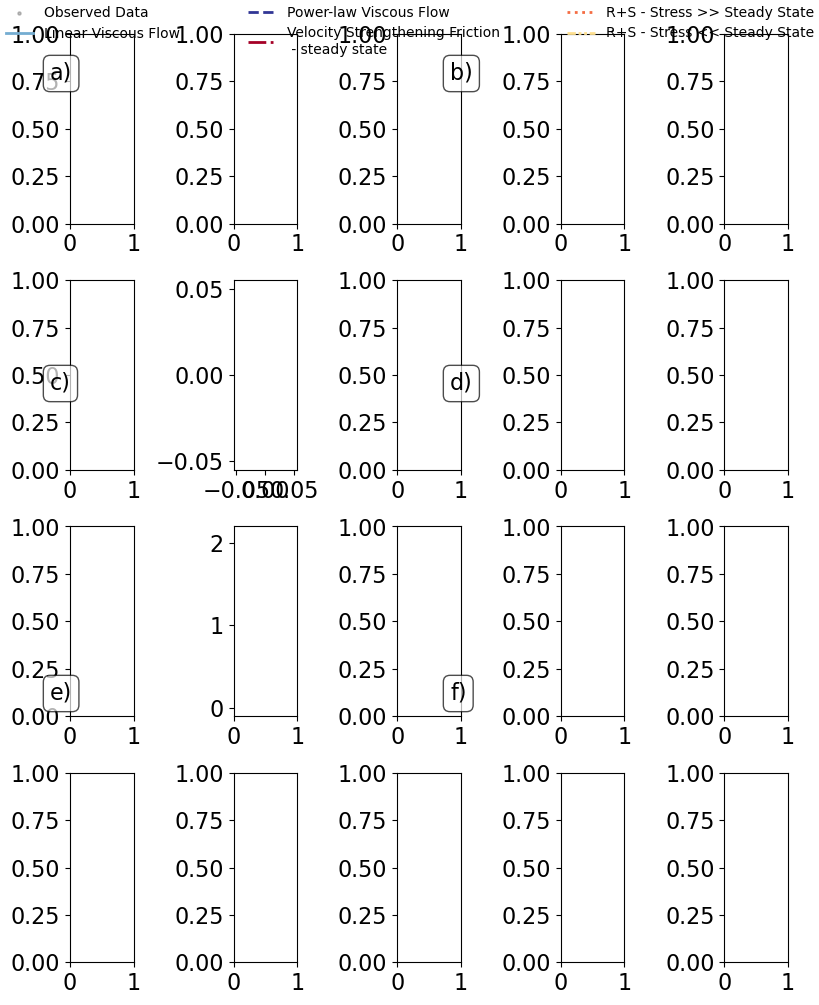

In [37]:
print('making figures')
#%matplotlib qt
from matplotlib import ticker
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)

C_matrix_2 = np.load('../../Rheology/XHR/XHR_2_covariance_matrix_4days_27_APR_23.npy')
C_matrix_3 = np.load('../../Rheology/XHR/XHR_3_covariance_matrix_4days_27_APR_23.npy')
C_matrix_inv_2 = np.linalg.inv(C_matrix_2)
C_matrix_inv_3 = np.linalg.inv(C_matrix_3)
selection = [105,88,72,64,30,4]
fig, axes = plt.subplots(nrows=4,ncols=5)#figure()
x=0
for j in range(2,len(selection)):
    i = selection[j]
    if i < 70:
        C_matrix_inv = C_matrix_inv_2
    else:
        C_matrix_inv = C_matrix_inv_3
    Creep_Phase_no = Creep_phases.iloc[i].dropna()
    #print(len(Creep_Phase_no))
    number_of_phases = (len(Creep_Phase_no)/2)-1
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_bSS/XHR_{i}_VSF_bSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
                dictionary_VSF_bSS = pickle.load(tf)
                res_VSF_SS = dictionary_VSF_bSS['fit']
                VSF_bSS_DF_params = dictionary_VSF_bSS['fitting params']
                VSF_bSS_all_params = VSF_bSS_all_params.append(VSF_bSS_DF_params.loc['fitted'],ignore_index=True)
                #print(VSF_bSS_all_params.iloc[-1])
                #print(res_VSF_SS.x)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_aSS/XHR_{i}_VSF_aSS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_aSS = pickle.load(tf)
            res_VSF_aSS = dictionary_VSF_aSS['fit']
            VSF_aSS_DF_params = dictionary_VSF_aSS['fitting params']
            VSF_aSS_all_params = VSF_aSS_all_params.append(VSF_aSS_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/VSF_SS/XHR_{i}_VSF_SS_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_VSF_SS = pickle.load(tf)
            res_VSF_SS = dictionary_VSF_SS['fit']
            VSF_SS_DF_params = dictionary_VSF_SS['fitting params']
            VSF_SS_all_params = VSF_SS_all_params.append(VSF_SS_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/PLV/XHR_{i}_PLV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_PLV = pickle.load(tf)
            res_PLV = dictionary_PLV['fit']
            PLV_DF_params = dictionary_PLV['fitting params']
            PLV_all_params = PLV_all_params.append(PLV_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
    try:
        with open("/home/earthquakes2/homes/Dan/Rheology/Single_rheology_28_APR_23/XHR/fits/Nelder-Mead/{i}/LNV/XHR_{i}_LNV_fit_dictionary_multi_phase_Nelder-Mead_01_MAY_23.txt".format(i=i), "rb") as tf:
            dictionary_LNV = pickle.load(tf)
            res_LNV = dictionary_LNV['fit']
            LNV_DF_params = dictionary_LNV['fitting params']
            LNV_all_params = LNV_all_params.append(LNV_DF_params.loc['fitted'],ignore_index=True)
    except FileNotFoundError:
        #print('FNF')
        continue
        
    
    
    test_t = np.arange(0,max(dataframes_long[i].Time.iloc[1:]),0.01)
    slip_LNV = rft.LNV_dromedary_plot(LNV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_PLV = rft.PLV_dromedary_plot(PLV_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF = rft.VSF_dromedary_plot(VSF_SS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_bSS = rft.VSF_bSS_dromedary_plot(VSF_bSS_DF_params.loc['fitted'],test_t,number_of_phases)
    slip_VSF_aSS = rft.VSF_aSS_dromedary_plot(VSF_aSS_DF_params.loc['fitted'],test_t,number_of_phases)
    #colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
    #colors = ['#0077bb','#009988','#33bbee','#ee7733','#ee3377']
    colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']
    #plt.subplot(3,2,j+1)
    if (j % 2) == 0:
        y = 1
    else:
        y=0
    #x=int(np.array(j/2.1).round(0))
    linewidth = 2

    for q in range(5):
        y=q
        axes[x,y].scatter(dataframes_long[i].Time-2,dataframes_long[i].Slip,s=5,color='grey')   
    
    axes[x,0].plot(test_t-2,slip_LNV, color = colors[3], linewidth=linewidth, linestyle = '-')
    axes[x,1].plot(test_t-2,slip_PLV, color = colors[4], linewidth=linewidth, linestyle = '--')
    axes[x,2].plot(test_t-2,slip_VSF, color = colors[0], linewidth=linewidth, linestyle = '-.')
    axes[x,3].plot(test_t-2,slip_VSF_aSS, color = colors[1], linewidth=linewidth, linestyle = 'dotted')
    axes[x,4].plot(test_t-2,slip_VSF_bSS, color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))
    x+=1
    #plt.legend(fontsize=11)
    #axes[x,y].set_xlabel('Time since start\n of event, hrs', fontsize=14)
    #axes[x,y].set_ylabel('Slip, mm',fontsize=14)
    #axes[x,y].xticks(fontsize=14)
    #axes[x,y].yticks(fontsize=14)
axes[2,1].set_ylim([-0.1,2.2])
axes[1,1].scatter([],[], label='Observed Data',s=5,color='grey', zorder=100,alpha=0.5)   
axes[1,1].plot([],[],label = 'Linear Viscous Flow', color = colors[3], linewidth=linewidth, linestyle = '-')
axes[1,1].plot([],[],label='Power-law Viscous Flow', color = colors[4], linewidth=linewidth, linestyle = '--')
axes[1,1].plot([],[],label = 'Velocity Strengthening Friction\n - steady state', color = colors[0], linewidth=linewidth, linestyle = '-.')
axes[1,1].plot([],[],label = 'R+S - Stress >> Steady State', color = colors[1], linewidth=linewidth, linestyle = 'dotted')
axes[1,1].plot([],[],label = 'R+S - Stress << Steady State', color = colors[2], linewidth=linewidth, linestyle = (0, (3, 1, 1, 1, 1, 1)))
#axes[0,0].legend(bbox_to_anchor=(0, 1.02, 2, .102), loc='lower left',ncol=6, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10) 
figure = plt.gcf()  # get current figure
figure.subplots_adjust(left=0.091, bottom=0.079, right=0.996, top=0.930, wspace=0.276, hspace=0.403)
figure.set_size_inches(8,10)
figure.text(0.05,0.93,'a)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.93,'b)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.62,'c)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.62,'d)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.31,'e)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.55,0.31,'f)',fontsize=16,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.legend(ncol=3, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=10)

plt.tight_layout()

In [38]:
np.mean(PLV_all_params['n1'])

KeyError: 'n1'

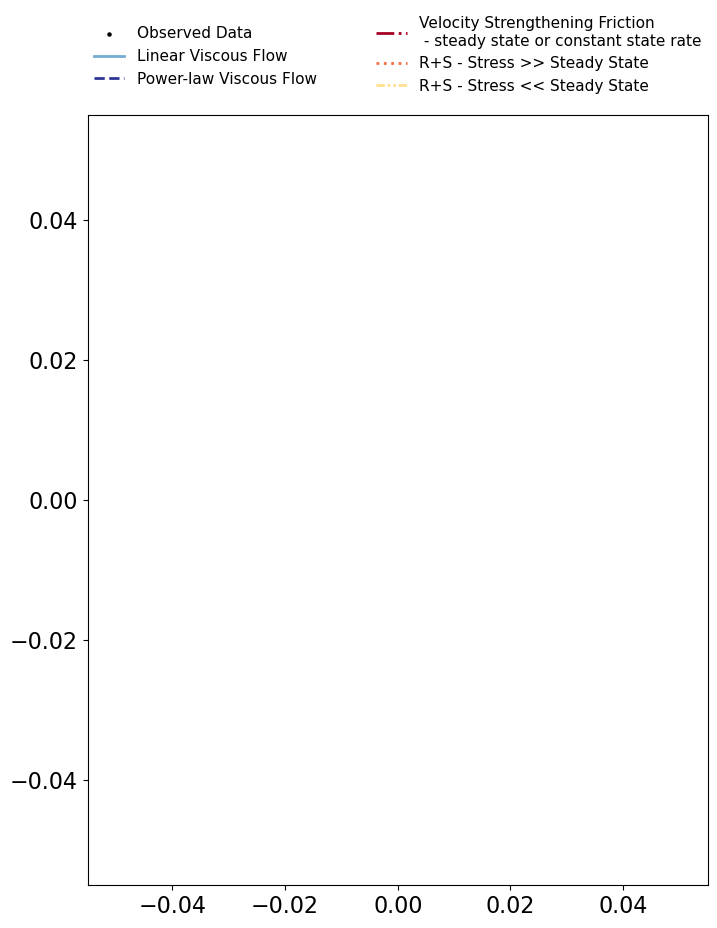

In [39]:
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
plt.scatter([],[], label='Observed Data',s=5,color='#000000', zorder=100)   
plt.plot([],[],label = 'Linear Viscous Flow', color = colors[3], linewidth=2, linestyle = '-')
plt.plot([],[],label='Power-law Viscous Flow', color = colors[4], linewidth=2, linestyle = '--')
plt.plot([],[],label = 'Velocity Strengthening Friction\n - steady state or constant state rate', color = colors[0], linewidth=2, linestyle = '-.')
plt.plot([],[],label = 'R+S - Stress >> Steady State', color = colors[1], linewidth=2, linestyle = 'dotted')
plt.plot([],[],label = 'R+S - Stress << Steady State', color = colors[2], linewidth=2, linestyle = (0, (3, 1, 1, 1, 1, 1)))
ax1.legend(bbox_to_anchor=(0, 1.02, 1, .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.0,framealpha=0.0,fontsize=11) 
fig.set_size_inches(8,10)

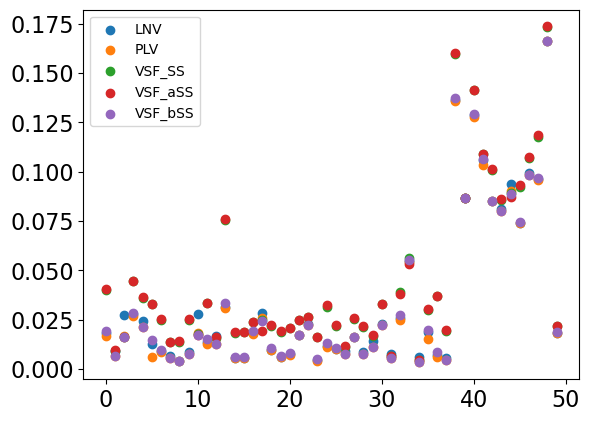

In [40]:
#%matplotlib qt
x_data = np.arange(0,len(LNV_misfit),1)
plt.figure()
plt.scatter(x_data,LNV_misfit,label='LNV')
plt.scatter(x_data,PLV_misfit,label='PLV')
plt.scatter(x_data,VSF_SS_misfit,label='VSF_SS')
plt.scatter(x_data,VSF_aSS_misfit,label='VSF_aSS')
plt.scatter(x_data,VSF_bSS_misfit,label='VSF_bSS')
plt.legend()
plt.show()

In [41]:
data_lines_XHR = pd.DataFrame({'LNV':LNV_misfit,'PLV':PLV_misfit,'VSF_SS':VSF_SS_misfit,'VSF_aSS':VSF_aSS_misfit,'VSF_bSS':VSF_bSS_misfit})
rheology_XHR = data_lines_XHR.idxmin(axis=1,skipna=True)
LNV_Count_XHR   = (np.sum(rheology_XHR.str.count("LNV"))/len(LNV_misfit))*100
PLV_Count_XHR  = (np.sum(rheology_XHR.str.count("PLV"))/len(PLV_misfit))*100
VSF_SS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_SS"))/len(VSF_SS_misfit))*100
VSF_aSS_Count_XHR = (np.sum(rheology_XHR.str.count("VSF_aSS"))/len(VSF_aSS_misfit))*100
VSF_bSS_Count_XHR  = (np.sum(rheology_XHR.str.count("VSF_bSS"))/len(VSF_bSS_misfit))*100
print('Linear Viscous Flow %: {k}'.format(k=LNV_Count_XHR.round(0)))
print('Power-law Viscous Flow %: {k}'.format(k=PLV_Count_XHR.round(0)))
print('Velocity Strenthening Friction, SS %: {k}'.format(k=VSF_SS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S > SS %: {k}'.format(k=VSF_aSS_Count_XHR.round(0)))
print('Velocity Strenthening Friction, S << SS %: {k}'.format(k=VSF_bSS_Count_XHR.round(0)))

Linear Viscous Flow %: 2.0
Power-law Viscous Flow %: 74.0
Velocity Strenthening Friction, SS %: 0.0
Velocity Strenthening Friction, S > SS %: 8.0
Velocity Strenthening Friction, S << SS %: 16.0


In [42]:
36*1.3

46.800000000000004

In [95]:
np.sum(rheology_XHR.str.count("PLV"))

37

In [96]:
rheo_cat=[]
for i in range(1):
    rheo_cat.append('lnv')
for i in range(36):
    rheo_cat.append('plv')
for i in range(17):
    rheo_cat.append('ss')
for i in range(3):
    rheo_cat.append('ass')
for i in range(9):
    rheo_cat.append('bss')

In [97]:
import random

#rheo_cat_selecta = []
lnv = []
plv = []
aSS = []
bSS = []
for k in range(1000):
    rheo_cat_selecta = []
    for j in range(len(rheo_cat)):
        selection = random.randint(0, len(rheo_cat)-1)
        rheo_cat_selecta.append(rheo_cat[selection])
    rheo_cat_df = pd.DataFrame({'rheo_cat':rheo_cat_selecta})
    grouped_rheo_cat = rheo_cat_df.groupby(rheo_cat_df['rheo_cat'])
    try:
        df_lnv = grouped_rheo_cat.get_group('lnv')
        lnv.append(round((len(df_lnv)/len(rheo_cat))*100))
    except KeyError:
        lnv.append(0)
    try:    
        df_plv = grouped_rheo_cat.get_group('plv')
        plv.append(round((len(df_plv)/len(rheo_cat))*100))
    except KeyError:
        plv.append(0)
    try:
        df_aSS = grouped_rheo_cat.get_group('ass')
        aSS.append(round((len(df_aSS)/len(rheo_cat))*100))
    except KeyError:
        aSS.append(0)
    try:
        df_bSS = grouped_rheo_cat.get_group('bss')
        bSS.append(round((len(df_bSS)/len(rheo_cat))*100))
    except KeyError:
        bSS.append(0)
print('lnv: 85% - {u}, 15% - {lo}'.format(u=np.percentile(lnv,85),lo =np.percentile(lnv,15).round(5)))
print('plv: 85% - {u}, 15% - {lo}'.format(u=np.percentile(plv,85).round(2),lo =np.percentile(plv,15).round(2)))
print('vsf_ass: 85% - {u}, 15% - {lo}'.format(u=np.percentile(aSS,85).round(2),lo =np.percentile(aSS,15).round(2)))
print('vsf_bss: 85% - {u}, 15% - {lo}'.format(u=np.percentile(bSS,85).round(2),lo =np.percentile(bSS,15).round(2)))

lnv: 85% - 3.0, 15% - 0.0
plv: 85% - 61.0, 15% - 48.0
vsf_ass: 85% - 8.0, 15% - 2.0
vsf_bss: 85% - 18.0, 15% - 9.0


In [46]:
#abs(np.array(PLV_misfit) - np.array(VSF_bSS_misfit))

In [47]:
'''plt.figure()
plt.scatter(np.arange(0,len(PLV_misfit)),abs(np.array(PLV_misfit) - np.array(LNV_misfit)))
plt.yscale('log')
plt.show()'''

"plt.figure()\nplt.scatter(np.arange(0,len(PLV_misfit)),abs(np.array(PLV_misfit) - np.array(LNV_misfit)))\nplt.yscale('log')\nplt.show()"

In [48]:
#rheology_XHR

  0%|          | 0/1000 [00:00<?, ?it/s]

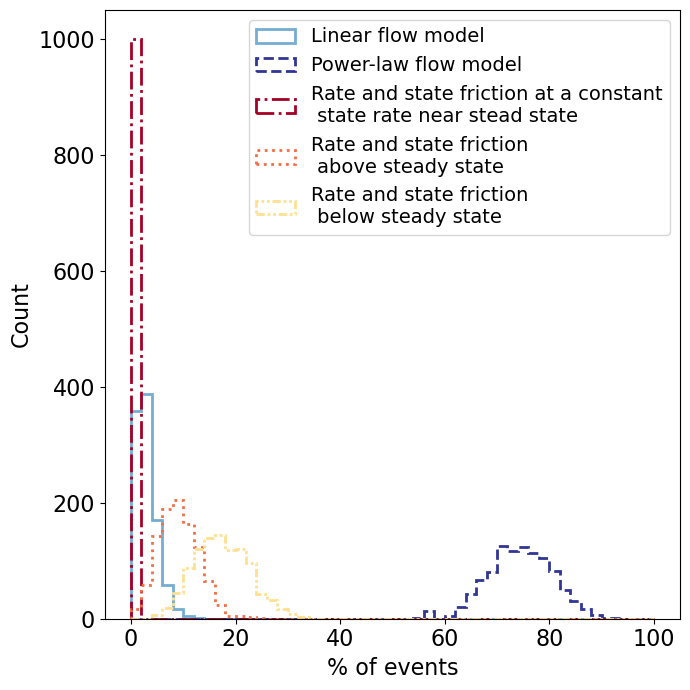

LNV lower:0.0
LNV upper:4.0
PLV lower:68.0
PLV upper:80.0
VSF lower:0.0
VSF upper:0.0
VSF_aSS lower:4.0
VSF_aSS upper:12.0
VSF_bSS lower:10.0
VSF_bSS upper:22.0


In [101]:
plt.close('all')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LNV_BOOT_XHR = []
PLV_BOOT_XHR = []
VSF_SS_BOOT_XHR = []
VSF_aSS_BOOT_XHR = []
VSF_bSS_BOOT_XHR=[]
LNV_all_params_BS = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
PLV_all_params_BS = pd.DataFrame(columns =['Ts','Vs','K','T01','S1','Tau1','V01','n1','T02','S2'])
VSF_SS_all_params_BS = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
VSF_aSS_all_params_BS = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Ta1','V01','t1','T02','S2'])
VSF_bSS_all_params_BS = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Tau1','V01','A_B1','T02','S2'])
Event  = np.arange(0,len(LNV_misfit),1)
j=0
for i in tqdm(range(1000)):#1000
    Random_events = np.random.choice(Event,len(LNV_misfit))
    RMS_LNV_BS_XHR = []
    RMS_PLV_BS_XHR = []
    RMS_VSF_BS_XHR = []
    RMS_VSF_aSS_BS_XHR = []
    RMS_VSF_bSS_BS_XHR = []
    for j in range(len(Random_events)):
        LNV_BOOT = LNV_misfit[Random_events[j]]
        RMS_LNV_BS_XHR.append(LNV_BOOT)
        #LNV_all_params_BS = pd.concat([LNV_all_params_BS,LNV_all_params.iloc[Random_events[j]]],ignore_index=True)
        
        PLV_BOOT = PLV_misfit[Random_events[j]]
        RMS_PLV_BS_XHR.append(PLV_BOOT)
        #PLV_all_params_BS = pd.concat([PLV_all_params_BS,PLV_all_params.iloc[Random_events[j]]],ignore_index=True)
    
        VSF_SS_BOOT = VSF_SS_misfit[Random_events[j]]
        RMS_VSF_BS_XHR.append(VSF_SS_BOOT)
        #VSF_SS_all_params_BS = pd.concat([VSF_SS_all_params_BS,VSF_SS_all_params.iloc[Random_events[j]]],ignore_index=True)
        
        VSF_aSS_BOOT = VSF_aSS_misfit[Random_events[j]]
        RMS_VSF_aSS_BS_XHR.append(VSF_aSS_BOOT)
        #VSF_aSS_all_params_BS = pd.concat([VSF_aSS_all_params_BS,VSF_aSS_all_params.iloc[Random_events[j]]],ignore_index=True)
            
        VSF_bSS_BOOT = VSF_bSS_misfit[Random_events[j]]
        RMS_VSF_bSS_BS_XHR.append(VSF_bSS_BOOT)
        #VSF_bSS_all_params_BS = pd.concat([VSF_bSS_all_params_BS,VSF_bSS_all_params.iloc[Random_events[j]]],ignore_index=True)
        
    data_lines_XHR_BS = pd.DataFrame({'LNV':RMS_LNV_BS_XHR,'PLV':RMS_PLV_BS_XHR,'VSFSS':RMS_VSF_BS_XHR,'VSF_aSS':RMS_VSF_aSS_BS_XHR,'VSF_bSS':RMS_VSF_bSS_BS_XHR})
    rheology_XHR_BS = data_lines_XHR_BS.idxmin(axis=1,skipna=True)
    LNV_Count_XHR_BS   = (np.sum(rheology_XHR_BS.str.count("LNV"))/len(Random_events))*100
    PLV_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("PLV"))/len(Random_events))*100
    VSF_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("VSFSS"))/len(Random_events))*100
    #print(VSF_Count_XHR_BS)
    VSF_aSS_Count_XHR_BS = (np.sum(rheology_XHR_BS.str.count("VSF_aSS"))/len(Random_events))*100
    VSF_bSS_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("VSF_bSS"))/len(Random_events))*100
    LNV_BOOT_XHR.append(LNV_Count_XHR_BS)
    PLV_BOOT_XHR.append(PLV_Count_XHR_BS)
    VSF_SS_BOOT_XHR.append(VSF_Count_XHR_BS)
    VSF_aSS_BOOT_XHR.append(VSF_aSS_Count_XHR_BS)
    VSF_bSS_BOOT_XHR.append(VSF_bSS_Count_XHR_BS)
#colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']
bins = np.arange(0,101,2)
plt.figure()
plt.subplot(1,1,1)
plt.hist(LNV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[3], linewidth=2,color = colors[3],linestyle='-',label='Linear flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,2)
plt.hist(PLV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[4], linewidth=2,color = colors[4],linestyle='--',label='Power-law flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,3)
plt.hist(VSF_SS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[0], linewidth=2,color = colors[0],linestyle='-.',\
         label='Rate and state friction at a constant\n state rate near stead state')
#plt.ylabel('Count')

#plt.subplot(5,1,4)
plt.hist(VSF_aSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[1], linewidth=2,color = colors[1],linestyle='dotted',label='Rate and state friction \n above steady state')
#plt.ylabel('Count')

#plt.subplot(5,1,5)
plt.hist(VSF_bSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[2], linewidth=2,color = colors[2],linestyle=(0, (3, 1, 1, 1, 1, 1)),label='Rate and state friction \n below steady state')
plt.xlabel('% of events',fontsize=16)
plt.ylabel('Count',fontsize=16)
#plt.xlim([-1,80])
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.tight_layout()
#plt.savefig('../../Thesis_figs/Rheology_percentage_bootstraps.pdf')
plt.savefig('../../../../../../../Macintosh HD/Users/dagi9522/Desktop/Rheology_percentage_bootstraps_misfit.pdf')
#fig.set_facecolor("lightgrey",alpha=0.5)
plt.show()


print('LNV lower:{k}'.format(k=np.percentile(LNV_BOOT_XHR,15).round(0)))
print('LNV upper:{k}'.format(k=np.percentile(LNV_BOOT_XHR,85).round(0)))
print('PLV lower:{k}'.format(k=np.percentile(PLV_BOOT_XHR,15).round(0)))
print('PLV upper:{k}'.format(k=np.percentile(PLV_BOOT_XHR,85).round(0)))
print('VSF lower:{k}'.format(k=np.percentile(VSF_SS_BOOT_XHR,15).round(0)))
print('VSF upper:{k}'.format(k=np.percentile(VSF_SS_BOOT_XHR,85).round(0)))
print('VSF_aSS lower:{k}'.format(k=np.percentile(VSF_aSS_BOOT_XHR,15).round(0)))
print('VSF_aSS upper:{k}'.format(k=np.percentile(VSF_aSS_BOOT_XHR,85).round(0)))
print('VSF_bSS lower:{k}'.format(k=np.percentile(VSF_bSS_BOOT_XHR,15).round(0)))
print('VSF_bSS upper:{k}'.format(k=np.percentile(VSF_bSS_BOOT_XHR,85).round(0)))

  0%|          | 0/1000 [00:00<?, ?it/s]

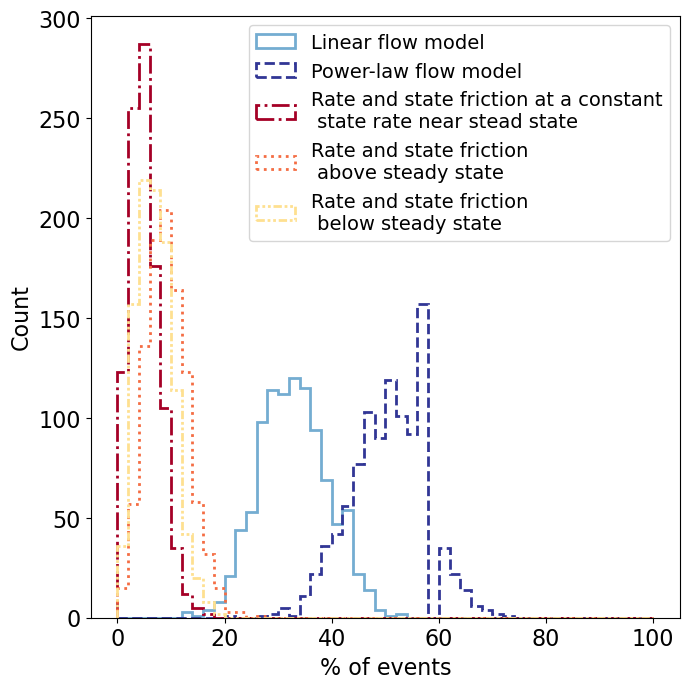

LNV lower:26.0
LNV upper:38.0
PLV lower:42.0
PLV upper:56.0
VSF lower:2.0
VSF upper:8.0
VSF_aSS lower:4.0
VSF_aSS upper:12.0
VSF_bSS lower:2.0
VSF_bSS upper:10.0


In [103]:
plt.close('all')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LNV_BOOT_XHR = []
PLV_BOOT_XHR = []
VSF_SS_BOOT_XHR = []
VSF_aSS_BOOT_XHR = []
VSF_bSS_BOOT_XHR=[]
LNV_all_params_BS = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
PLV_all_params_BS = pd.DataFrame(columns =['Ts','Vs','K','T01','S1','Tau1','V01','n1','T02','S2'])
VSF_SS_all_params_BS = pd.DataFrame(columns=['Ts','Vs','K','T01','S1','Tau1','V01','T02','S2'])
VSF_aSS_all_params_BS = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Ta1','V01','t1','T02','S2'])
VSF_bSS_all_params_BS = pd.DataFrame(columns = ['Ts','Vs','K','T01','S1','Tau1','V01','A_B1','T02','S2'])
Event  = np.arange(0,len(LNV_misfit),1)
j=0
for i in tqdm(range(1000)):#1000
    Random_events = np.random.choice(Event,len(LNV_misfit))
    RMS_LNV_BS_XHR = []
    RMS_PLV_BS_XHR = []
    RMS_VSF_BS_XHR = []
    RMS_VSF_aSS_BS_XHR = []
    RMS_VSF_bSS_BS_XHR = []
    for j in range(len(Random_events)):
        LNV_BOOT = LNV_AIC[Random_events[j]]
        RMS_LNV_BS_XHR.append(LNV_BOOT)
        #LNV_all_params_BS = pd.concat([LNV_all_params_BS,LNV_all_params.iloc[Random_events[j]]],ignore_index=True)
        
        PLV_BOOT = PLV_AIC[Random_events[j]]
        RMS_PLV_BS_XHR.append(PLV_BOOT)
        #PLV_all_params_BS = pd.concat([PLV_all_params_BS,PLV_all_params.iloc[Random_events[j]]],ignore_index=True)
    
        VSF_SS_BOOT = VSF_SS_AIC[Random_events[j]]
        RMS_VSF_BS_XHR.append(VSF_SS_BOOT)
        #VSF_SS_all_params_BS = pd.concat([VSF_SS_all_params_BS,VSF_SS_all_params.iloc[Random_events[j]]],ignore_index=True)
        
        VSF_aSS_BOOT = VSF_aSS_AIC[Random_events[j]]
        RMS_VSF_aSS_BS_XHR.append(VSF_aSS_BOOT)
        #VSF_aSS_all_params_BS = pd.concat([VSF_aSS_all_params_BS,VSF_aSS_all_params.iloc[Random_events[j]]],ignore_index=True)
            
        VSF_bSS_BOOT = VSF_bSS_AIC[Random_events[j]]
        RMS_VSF_bSS_BS_XHR.append(VSF_bSS_BOOT)
        #VSF_bSS_all_params_BS = pd.concat([VSF_bSS_all_params_BS,VSF_bSS_all_params.iloc[Random_events[j]]],ignore_index=True)
        
    data_lines_XHR_BS = pd.DataFrame({'LNV':RMS_LNV_BS_XHR,'PLV':RMS_PLV_BS_XHR,'VSFSS':RMS_VSF_BS_XHR,'VSF_aSS':RMS_VSF_aSS_BS_XHR,'VSF_bSS':RMS_VSF_bSS_BS_XHR})
    rheology_XHR_BS = data_lines_XHR_BS.idxmin(axis=1,skipna=True)
    LNV_Count_XHR_BS   = (np.sum(rheology_XHR_BS.str.count("LNV"))/len(Random_events))*100
    PLV_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("PLV"))/len(Random_events))*100
    VSF_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("VSFSS"))/len(Random_events))*100
    #print(VSF_Count_XHR_BS)
    VSF_aSS_Count_XHR_BS = (np.sum(rheology_XHR_BS.str.count("VSF_aSS"))/len(Random_events))*100
    VSF_bSS_Count_XHR_BS  = (np.sum(rheology_XHR_BS.str.count("VSF_bSS"))/len(Random_events))*100
    LNV_BOOT_XHR.append(LNV_Count_XHR_BS)
    PLV_BOOT_XHR.append(PLV_Count_XHR_BS)
    VSF_SS_BOOT_XHR.append(VSF_Count_XHR_BS)
    VSF_aSS_BOOT_XHR.append(VSF_aSS_Count_XHR_BS)
    VSF_bSS_BOOT_XHR.append(VSF_bSS_Count_XHR_BS)
#colors = ['#359b73','#2271b2','#3db7e9','#d55e00','#e69f00','#f0e442','#fdae61']
colors = ['#a50026','#f46d43','#fee090','#74add1','#313695']
bins = np.arange(0,101,2)
plt.figure()
plt.subplot(1,1,1)
plt.hist(LNV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[3], linewidth=2,color = colors[3],linestyle='-',label='Linear flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,2)
plt.hist(PLV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[4], linewidth=2,color = colors[4],linestyle='--',label='Power-law flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,3)
plt.hist(VSF_SS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[0], linewidth=2,color = colors[0],linestyle='-.',\
         label='Rate and state friction at a constant\n state rate near stead state')
#plt.ylabel('Count')

#plt.subplot(5,1,4)
plt.hist(VSF_aSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[1], linewidth=2,color = colors[1],linestyle='dotted',label='Rate and state friction \n above steady state')
#plt.ylabel('Count')

#plt.subplot(5,1,5)
plt.hist(VSF_bSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[2], linewidth=2,color = colors[2],linestyle=(0, (3, 1, 1, 1, 1, 1)),label='Rate and state friction \n below steady state')
plt.xlabel('% of events',fontsize=16)
plt.ylabel('Count',fontsize=16)
#plt.xlim([-1,80])
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.tight_layout()
plt.savefig('../../../../../../../Macintosh HD/Users/dagi9522/Desktop/Rheology_percentage_bootstraps_AIC.pdf')
#fig.set_facecolor("lightgrey",alpha=0.5)
plt.show()


print('LNV lower:{k}'.format(k=np.percentile(LNV_BOOT_XHR,15).round(0)))
print('LNV upper:{k}'.format(k=np.percentile(LNV_BOOT_XHR,85).round(0)))
print('PLV lower:{k}'.format(k=np.percentile(PLV_BOOT_XHR,15).round(0)))
print('PLV upper:{k}'.format(k=np.percentile(PLV_BOOT_XHR,85).round(0)))
print('VSF lower:{k}'.format(k=np.percentile(VSF_SS_BOOT_XHR,15).round(0)))
print('VSF upper:{k}'.format(k=np.percentile(VSF_SS_BOOT_XHR,85).round(0)))
print('VSF_aSS lower:{k}'.format(k=np.percentile(VSF_aSS_BOOT_XHR,15).round(0)))
print('VSF_aSS upper:{k}'.format(k=np.percentile(VSF_aSS_BOOT_XHR,85).round(0)))
print('VSF_bSS lower:{k}'.format(k=np.percentile(VSF_bSS_BOOT_XHR,15).round(0)))
print('VSF_bSS upper:{k}'.format(k=np.percentile(VSF_bSS_BOOT_XHR,85).round(0)))

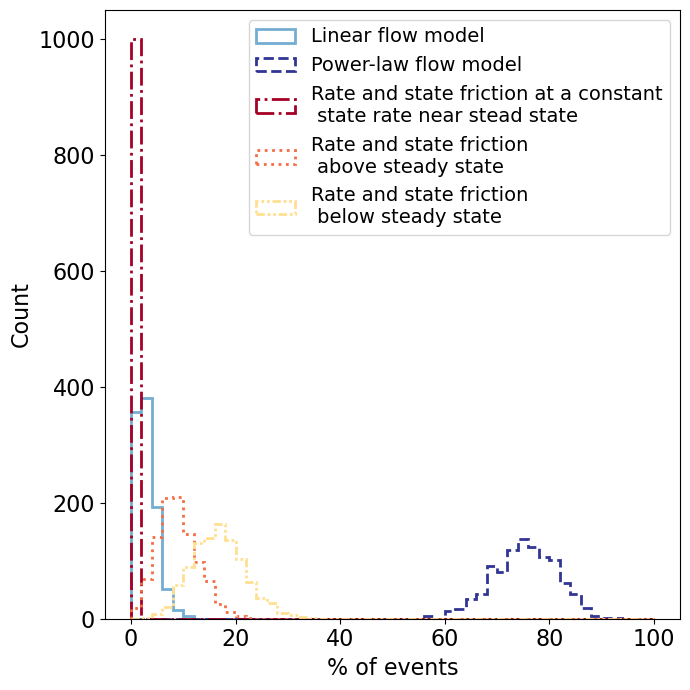

In [85]:
plt.figure()
plt.subplot(1,1,1)
plt.hist(LNV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[3], linewidth=2,color = colors[3],linestyle='-',label='Linear flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,2)
plt.hist(PLV_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[4], linewidth=2,color = colors[4],linestyle='--',label='Power-law flow model')
#plt.ylabel('Count')

#plt.subplot(5,1,3)
plt.hist(VSF_SS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[0], linewidth=2,color = colors[0],linestyle='-.',\
         label='Rate and state friction at a constant\n state rate near stead state')
#plt.ylabel('Count')

#plt.subplot(5,1,4)
plt.hist(VSF_aSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[1], linewidth=2,color = colors[1],linestyle='dotted',label='Rate and state friction \n above steady state')
#plt.ylabel('Count')

#plt.subplot(5,1,5)
plt.hist(VSF_bSS_BOOT_XHR,bins=bins,histtype = 'step',edgecolor=colors[2], linewidth=2,color = colors[2],linestyle=(0, (3, 1, 1, 1, 1, 1)),label='Rate and state friction \n below steady state')
plt.xlabel('% of events',fontsize=16)
plt.ylabel('Count',fontsize=16)
#plt.xlim([-1,80])
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.tight_layout()
#plt.savefig('../../Thesis_figs/Rheology_percentage_bootstraps.pdf')
#fig.set_facecolor("lightgrey",alpha=0.5)
plt.show()

In [86]:
Random_events

array([38,  8, 27, 18, 22, 31, 43, 17, 36, 12, 11, 30, 43,  0, 41,  3, 19,
       43, 22, 27,  6, 27, 26,  0,  8, 37,  0, 44, 14, 26,  7,  1, 47, 16,
       25, 25, 42, 11,  7, 15, 35, 33,  5,  7, 43, 32,  6, 41, 35,  2])

In [87]:
dataframes_long[0].head(7)

,index,Time,Slip,Velocity,Acceleration
0,8130,0.000000,0.00,0.00,0.00
1,8131,0.166667,0.00,0.00,0.00
2,8132,0.333333,0.00,0.00,0.00
3,8133,0.500000,0.00,0.00,0.00
4,8134,0.666667,0.00,0.00,0.09
5,8135,0.833333,0.00,0.03,0.00
6,8136,1.000000,0.01,0.00,-0.18


In [88]:
print(np.mean(PLV_all_params_BS['n1']),np.median(PLV_all_params_BS['n1']))

nan nan


/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dagi9522/miniconda3/envs/creepmeters/lib/python3.10/site-packages/numpy/core/_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


In [89]:
#LNV_all_params_BS.reset_index(inplace=True)
LNV_all_params_BS.rename(columns={'Tau1':'$t_c$','V01':'$V_0$'},inplace=True)

#PLV_all_params_BS.reset_index(inplace=True)
PLV_all_params_BS.rename(columns={'Tau1':'$t_c$','V01':'$V_0$','n1':'n'},inplace=True)

#VSF_SS_all_params_BS.reset_index(inplace=True)
VSF_SS_all_params_BS.rename(columns={'Tau1':'$t_ss$','V01':'$V_0$'},inplace=True)

#VSF_aSS_all_params_BS.reset_index(inplace=True)
VSF_aSS_all_params_BS.rename(columns={'Ta1':'$t_a$','V01':'$V_0$','t1':'$t_1$'},inplace=True)

#VSF_bSS_all_params_BS.reset_index(inplace=True)
VSF_bSS_all_params_BS.rename(columns={'Tau1':'$\theta_0$','V01':'$V_0$','A_B1':'$B/A$'},inplace=True)

In [90]:
PLV_all_params_BS

,Ts,Vs,K,T01,S1,$t_c$,$V_0$,n,T02,S2


In [91]:
import matplotlib
from matplotlib import ticker
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

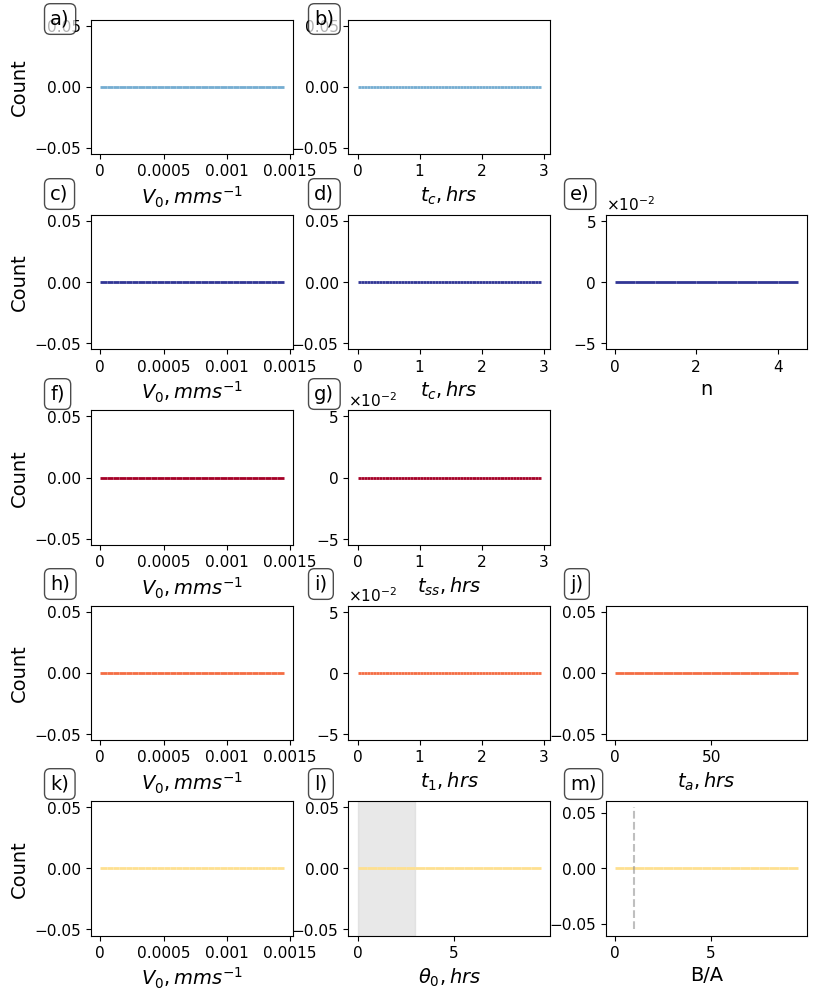

In [92]:
plt.close('all')
plt.figure()
ax1=plt.subplot2grid((5,3),(0,0),1,1)
bins = np.arange(0,0.0015,0.00005)#bins = np.linspace(0,5,51)
plt.hist(LNV_all_params_BS['$V_0$']/3600,bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
#plt.ylim([0,7000])
plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, mms^{-1}$',fontsize=14)
#ax1.yaxis.set_major_formatter(formatter) 
#ax1.set_xticklabels([])

ax4 = plt.subplot2grid((5,3),(1,0),1,1)
plt.hist(PLV_all_params_BS['$V_0$']/3600,bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
#plt.ylim([0,7000])
plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, mms^{-1}$',fontsize=14)
#ax4.yaxis.set_major_formatter(formatter) 

ax7 = plt.subplot2grid((5,3),(2,0),1,1)
plt.hist(VSF_SS_all_params_BS['$V_0$']/3600,bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
#plt.ylim([0,7000])
plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, mms^{-1}$',fontsize=14)
#ax7.yaxis.set_major_formatter(formatter) 

ax10 = plt.subplot2grid((5,3),(3,0),1,1)
plt.hist(VSF_aSS_all_params_BS['$V_0$']/3600,bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
#plt.ylim([0,7000])
plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, mms^{-1}$',fontsize=14)
#ax10.yaxis.set_major_formatter(formatter) 

ax13 = plt.subplot2grid((5,3),(4,0),1,1)
plt.hist(VSF_bSS_all_params_BS['$V_0$']/3600,bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2])
#plt.ylim([0,7000])
plt.xticks([0,0.0005,0.001,0.0015],[0,0.0005,0.001,0.0015])
plt.ylabel('Count',fontsize=14)
plt.xlabel('$V_0, mms^{-1}$',fontsize=14)
#ax13.yaxis.set_major_formatter(formatter) 

ax2 = plt.subplot2grid((5,3),(0,1),1,1)
bins = np.arange(0,3,0.05)#bins = np.linspace(0,5,51)
plt.hist(LNV_all_params_BS['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[3], linewidth=2,color = colors[3])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_c, hrs$',fontsize=14)
#ax2.yaxis.set_major_formatter(formatter) 
#ax1.set_xticklabels([])

ax5 = plt.subplot2grid((5,3),(1,1),1,1)
plt.hist(PLV_all_params_BS['$t_c$'],bins=bins,histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_c, hrs$',fontsize=14)
#ax5.yaxis.set_major_formatter(formatter) 

ax8 = plt.subplot2grid((5,3),(2,1),1,1)
plt.hist(VSF_SS_all_params_BS['$t_ss$'],bins=bins,histtype = 'bar',edgecolor=colors[0], linewidth=2,color = colors[0])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_{ss}, hrs$',fontsize=14)
ax8.yaxis.set_major_formatter(formatter) 

ax11 = plt.subplot2grid((5,3),(3,1),1,1)
plt.hist(VSF_aSS_all_params_BS['$t_1$'],bins=bins,histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1])
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_1, hrs$',fontsize=14)
ax11.yaxis.set_major_formatter(formatter) 

ax14 = plt.subplot2grid((5,3),(4,1),1,1)
bins = np.arange(0,10,0.5)
plt.hist(VSF_bSS_all_params_BS['$\theta_0$'],bins=bins,histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],zorder=100)
left,right = ax14.get_xlim()
bottom,top = ax14.get_ylim()
ax14.add_patch(Rectangle((0,bottom),3,top-bottom, facecolor='lightgrey', edgecolor='lightgrey',alpha=0.5,zorder=2))
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel("$\\theta_0 , hrs$",fontsize=14)
#plt.xlabel('$V_0, mms^{-1}$')
#ax14.yaxis.set_major_formatter(formatter) 

ax6 = plt.subplot2grid((5,3),(1,2),1,1)
bins=np.arange(0,5,0.5)
plt.hist(PLV_all_params_BS['n'],histtype = 'bar',edgecolor=colors[4], linewidth=2,color = colors[4],bins=bins)
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('n',fontsize=14)
ax6.yaxis.set_major_formatter(formatter) 

ax12 = plt.subplot2grid((5,3),(3,2),1,1)
bins=np.arange(0,100,5)
plt.hist(VSF_aSS_all_params_BS['$t_a$'],histtype = 'bar',edgecolor=colors[1], linewidth=2,color = colors[1],bins=bins)
#plt.ylim([0,7000])
#plt.ylabel('Count',fontsize=14)
plt.xlabel('$t_a, hrs$',fontsize=14)
bins=np.arange(0,10,0.5)
#ax12.yaxis.set_major_formatter(formatter) 

ax15 = plt.subplot2grid((5,3),(4,2),1,1)
plt.hist(VSF_bSS_all_params_BS['$B/A$'],histtype = 'bar',edgecolor=colors[2], linewidth=2,color = colors[2],bins=bins)
#plt.ylim([0,7000])
plt.yticks(fontsize=14)
#plt.ylabel('Count',fontsize=14)
plt.xlabel("B/A",fontsize=14)
plt.yticks(fontsize=11)
bottom,top = ax15.get_ylim()
ax15.plot([1,1],[bottom,top],color='grey',alpha=0.5,linestyle='--')
#plt.xticks([0,1,2,4,8],[0,1,2,4,8])
#ax15.yaxis.set_major_formatter(formatter) 
figure = plt.gcf()
figure.subplots_adjust(left=0.101, bottom=0.064, right=0.996, top=0.980, wspace=0.276, hspace=0.453)
figure.set_size_inches(8,10)
figure.text(0.05,0.975,'a)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.975,'b)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.8,'c)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.8,'d)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.8,'e)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.60,'f)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.60,'g)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.41,'h)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.41,'i)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.41,'j)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.05,0.21,'k)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.38,0.21,'l)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
figure.text(0.7,0.21,'m)',fontsize=14,bbox=dict(facecolor='white', boxstyle='round',alpha=0.7))
plt.show()